In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

import math
import csv
%matplotlib inline

In [4]:
%cd ~/Datasets/project07

/Users/christophereppig/Datasets/Project07


In [5]:
%ls

Airport_operations.csv     airports.csv
airport_cancellations.csv


In [39]:
airports = pd.read_csv('airports.csv', encoding='utf-8')
operations = pd.read_csv('Airport_operations.csv', encoding='utf-8')
cancellations = pd.read_csv('airport_cancellations.csv', encoding='utf-8')

## Airports exploration

In [7]:
airports.head()

Key LocID                   AP_NAME  \
0  3443.0   STX           HENRY E ROHLSEN   
1  5088.0   X64                  PATILLAS   
2  2886.0   PSE                 MERCEDITA   
3  2879.0   VQS  ANTONIO RIVERA RODRIGUEZ   
4  2883.0   X63                   HUMACAO   

                                 ALIAS Facility Type FAA REGION  \
0        Henry E Rohlsen Int'l Airport       Airport        ASO   
1                                  NaN       Airport        ASO   
2                 Aeropuerto Mercedita       Airport        ASO   
3  Aeropuerto Antonio Rivera Rodr�guez       Airport        ASO   
4       Aeropuerto Regional De Humacao       Airport        ASO   

             COUNTY             CITY STATE     AP Type   Latitude  Longitude  \
0  -VIRGIN ISLANDS-    CHRISTIANSTED    VI  Public Use  17.701556 -64.801722   
1            #NAME?         PATILLAS    PR  Public Use  17.982189 -66.019330   
2            #NAME?            PONCE    PR  Public Use  18.008306 -66.563028   
3            #NAME?  ISLA DE VIEQUES    PR  Public Use  18.134811 -65.493617   
4            #NAME?          HUMACAO    PR  Public Use  18.138017 -65.800718   

  Boundary Data Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                     Yes

In [47]:
airports[airports['LocID']=='ABQ']

Key LocID                   AP_NAME                      ALIAS  \
1223  2348.0   ABQ  ALBUQUERQUE INTL SUNPORT  Albuquerque Int'l Sunport   

     Facility Type FAA REGION      COUNTY         CITY STATE  \
1223       Airport        ASW  BERNALILLO  ALBUQUERQUE    NM   

                     AP Type   Latitude   Longitude Boundary Data Available  
1223  Federalized/Commercial  35.040194 -106.609194                     Yes

In [ ]:
airports['city'].value_counts()

In [46]:
len(airports['LocID'].value_counts())

5152

In [40]:
locations = airports['LocID'].value_counts()

In [45]:
locations[:][0]

1

In [8]:
airports.shape

(5167, 13)

In [22]:
airports.isnull().any()

Key                        True
LocID                      True
AP_NAME                    True
ALIAS                      True
Facility Type              True
FAA REGION                 True
COUNTY                     True
CITY                       True
STATE                      True
AP Type                    True
Latitude                   True
Longitude                  True
Boundary Data Available    True
dtype: bool

In [23]:
airports.isnull().sum()

Key                           3
LocID                        15
AP_NAME                       3
ALIAS                      1669
Facility Type                 3
FAA REGION                    3
COUNTY                        3
CITY                          3
STATE                         3
AP Type                       3
Latitude                      3
Longitude                     3
Boundary Data Available       3
dtype: int64

In [24]:
airports.describe()

/Users/christophereppig/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Key     Latitude    Longitude
count  5164.000000  5164.000000  5164.000000
mean   2786.645236    40.669348   -98.817645
std    1493.693985     7.988298    20.953579
min     203.000000    17.701556  -177.381308
25%            NaN          NaN          NaN
50%            NaN          NaN          NaN
75%            NaN          NaN          NaN
max    5375.000000    71.284889   -64.801722

In [26]:
airports.dtypes

Key                        float64
LocID                       object
AP_NAME                     object
ALIAS                       object
Facility Type               object
FAA REGION                  object
COUNTY                      object
CITY                        object
STATE                       object
AP Type                     object
Latitude                   float64
Longitude                  float64
Boundary Data Available     object
dtype: object

## Operations Exploration

In [10]:
operations.shape

(841, 15)

In [50]:
operations.head(25)

airport  year  departures for metric computation  \
0      ABQ  2004                              53971   
1      ABQ  2005                              51829   
2      ABQ  2006                              49682   
3      ABQ  2007                              53255   
4      ABQ  2008                              49589   
5      ABQ  2009                              42550   
6      ABQ  2010                              42302   
7      ABQ  2011                              42283   
8      ABQ  2012                              39105   
9      ABQ  2013                              35277   
10     ABQ  2014                              33292   
11     ANC  2004                              16503   
12     ANC  2005                              72043   
13     ANC  2006                              75708   
14     ANC  2007                              78741   
15     ANC  2008                              76606   
16     ANC  2009                              67252   
17     ANC  2010                              73089   
18     ANC  2011                              72556   
19     ANC  2012                              70322   
20     ANC  2013                              69984   
21     ANC  2014                              71099   
22     ATL  2004                             477323   
23     ATL  2005                             484570   
24     ATL  2006                             483334   

    arrivals for metric computation  percent on-time gate departures  \
0                             53818                           0.8030   
1                             51877                           0.8140   
2                             51199                           0.7983   
3                             53611                           0.8005   
4                             49512                           0.8103   
5                             42704                           0.8341   
6                             42169                           0.8144   
7                             42297                           0.8072   
8                             39107                           0.8219   
9                             34989                           0.7710   
10                            33137                           0.7451   
11                            15511                           0.7109   
12                            67034                           0.7394   
13                            69995                           0.7771   
14                            73323                           0.7838   
15                            72479                           0.7972   
16                            63135                           0.8112   
17                            68125                           0.7992   
18                            66845                           0.8276   
19                            66453                           0.8442   
20                            65469                           0.8432   
21                            66704                           0.8288   
22                           473249                           0.7596   
23                           480171                           0.7413   
24                           478735                           0.7150   

    percent on-time airport departures  percent on-time gate arrivals  \
0                               0.7809                         0.7921   
1                               0.7922                         0.8001   
2                               0.7756                         0.7746   
3                               0.7704                         0.7647   
4                               0.7844                         0.7875   
5                               0.8147                         0.8224   
6                               0.7907                         0.8047   
7                               0.7758                         0.8022   
8                               0.7940    

In [52]:
len(set(operations['airport']))

77

In [16]:
operations.isnull().any()

airport                               False
year                                  False
departures for metric computation     False
arrivals for metric computation       False
percent on-time gate departures       False
percent on-time airport departures    False
percent on-time gate arrivals         False
average_gate_departure_delay          False
average_taxi_out_time                 False
average taxi out delay                False
average airport departure delay       False
average airborne delay                False
average taxi in delay                 False
average block delay                   False
average gate arrival delay            False
dtype: bool

In [28]:
operations.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
dtype: object

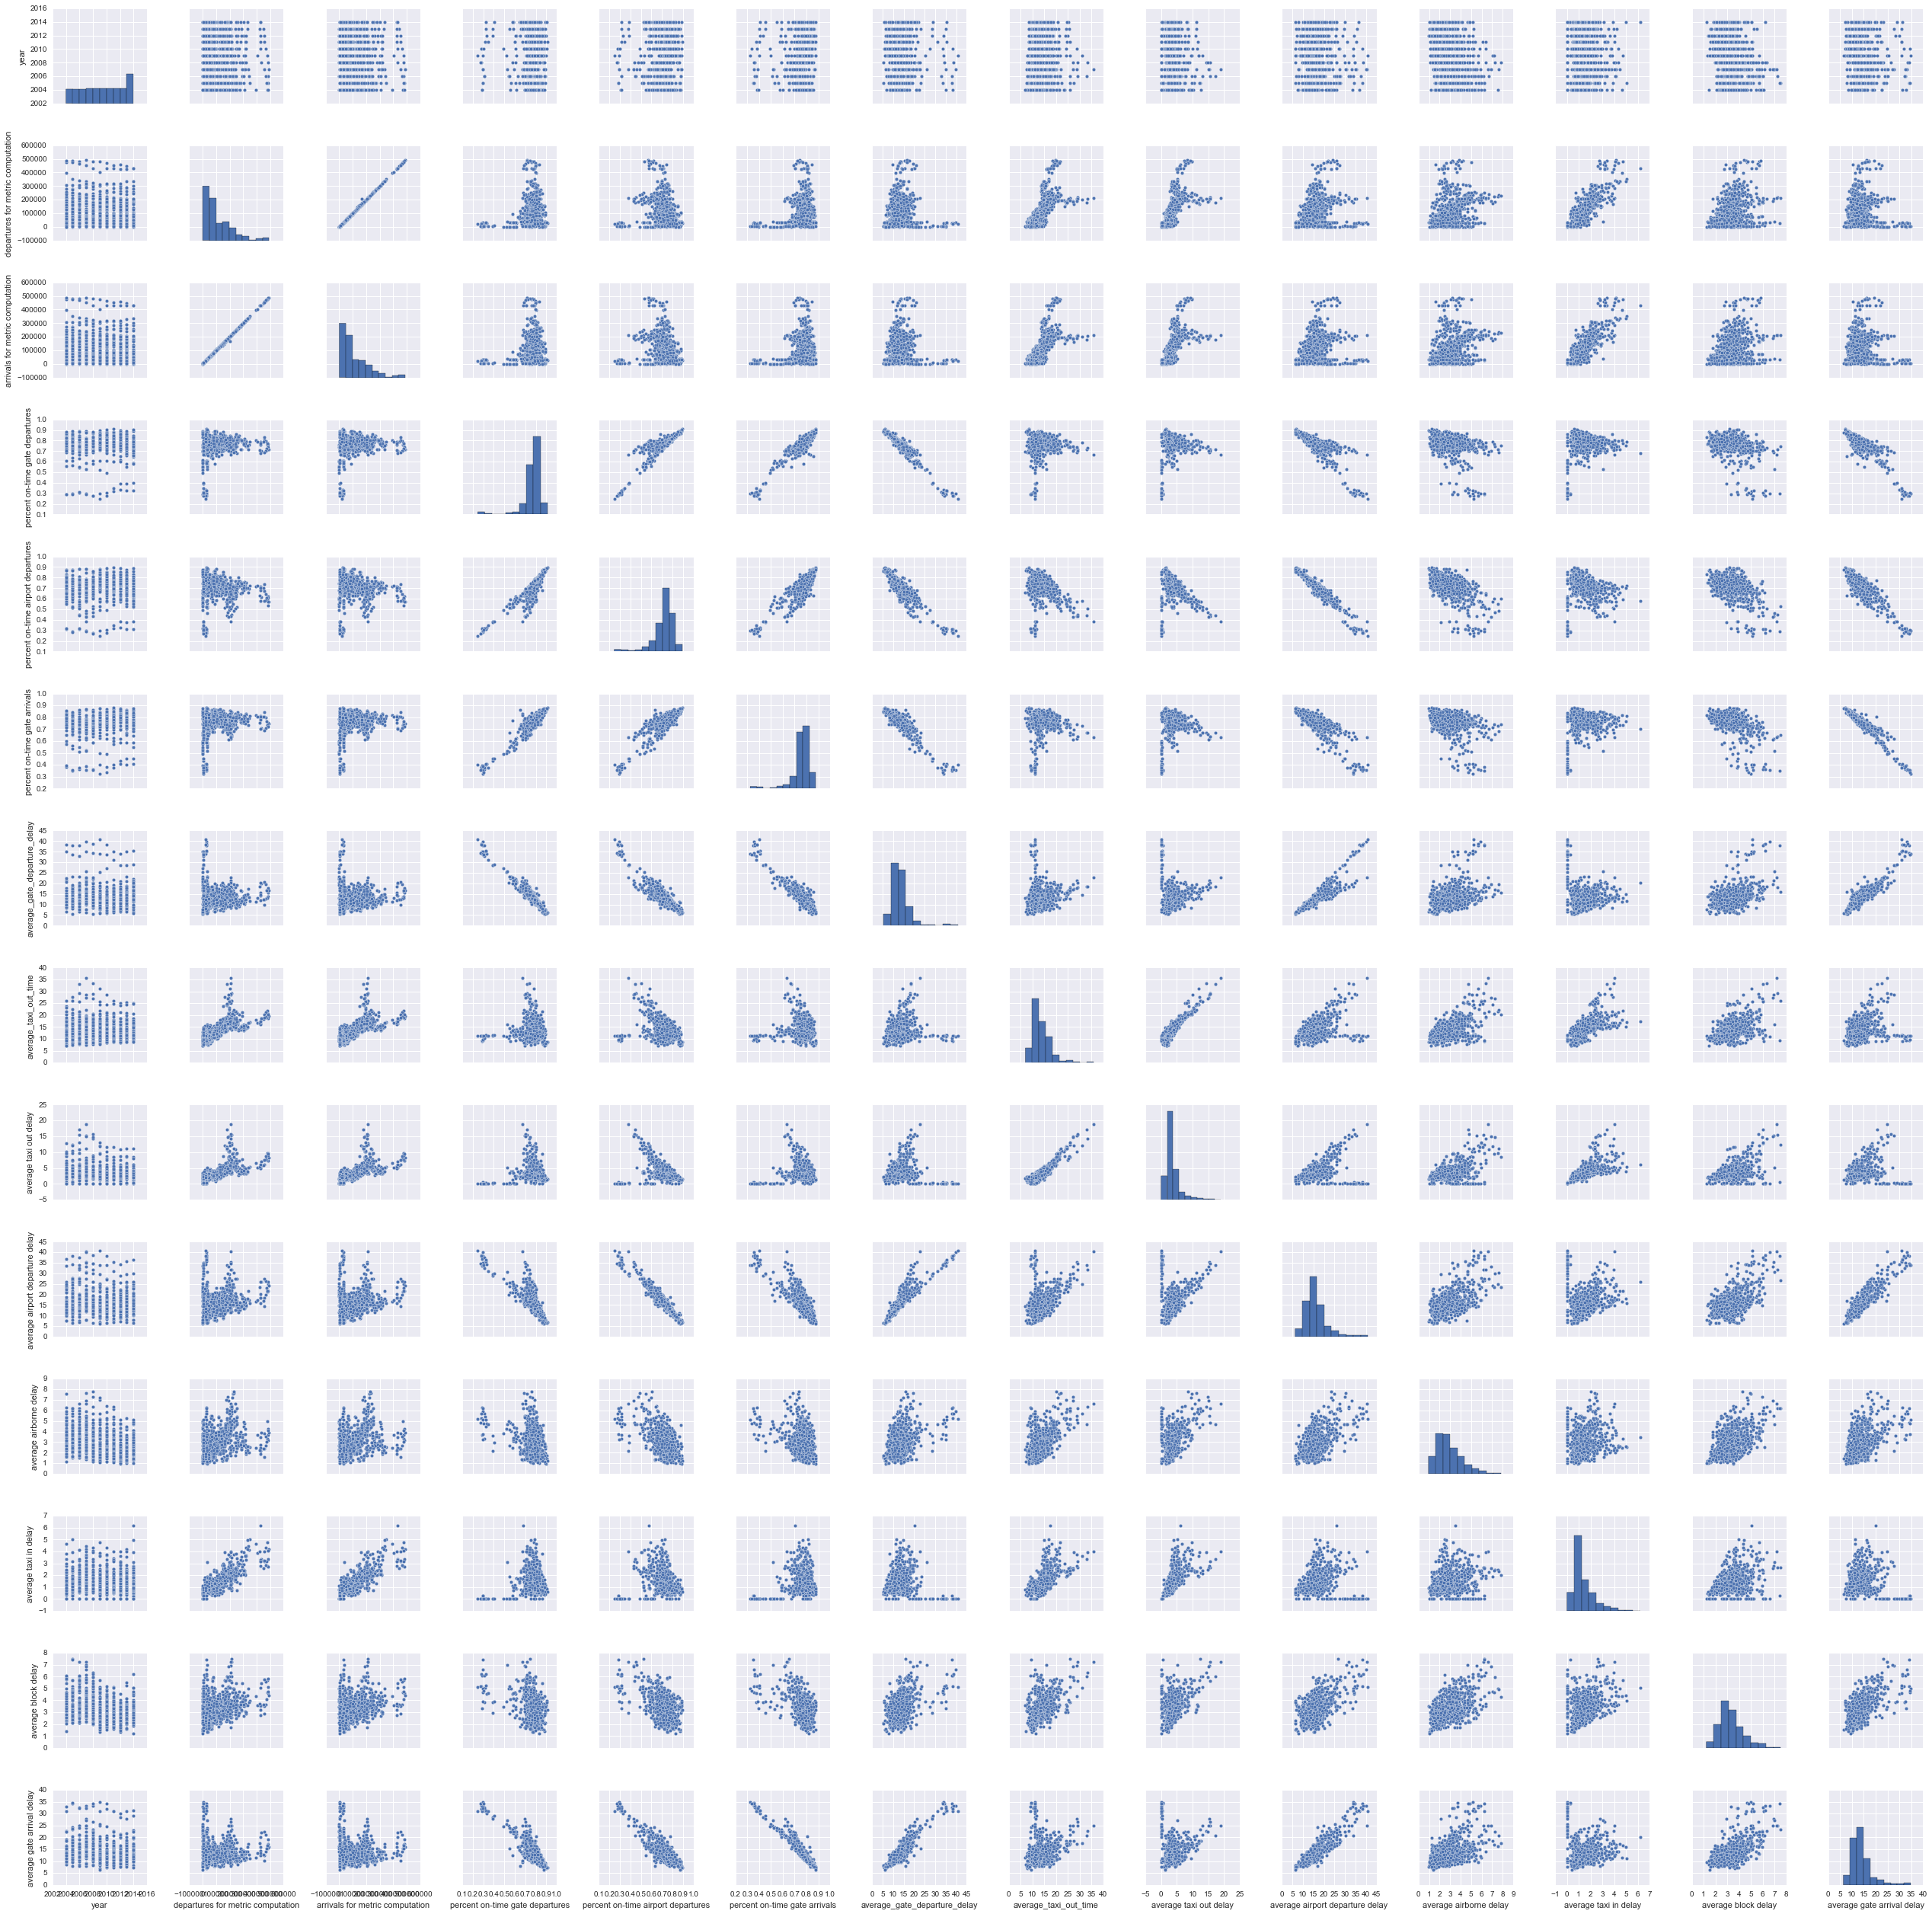

In [291]:
sns.pairplot(operations)

## Cancellations Exploration

In [13]:
cancellations.head()

Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   
1     ABQ  2005.0                    221.0                  190.0   
2     ABQ  2006.0                    392.0                  329.0   
3     ABQ  2007.0                    366.0                  304.0   
4     ABQ  2008.0                    333.0                  300.0   

   Departure Diversions  Arrival Diversions  
0                  71.0                46.0  
1                  61.0                33.0  
2                  71.0               124.0  
3                 107.0                45.0  
4                  79.0                42.0

In [139]:
cancellations['Year'] = cancellations['Year'].apply(int)

In [15]:
cancellations.isnull().any()

Airport                    False
Year                       False
Departure Cancellations    False
Arrival Cancellations      False
Departure Diversions       False
Arrival Diversions         False
dtype: bool

In [11]:
cancellations.shape

(805, 6)

In [27]:
cancellations.dtypes

Airport                     object
Year                       float64
Departure Cancellations    float64
Arrival Cancellations      float64
Departure Diversions       float64
Arrival Diversions         float64
dtype: object

In [29]:
cancellations.columns

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

(array([ 626.,  112.,   33.,   13.,   10.,    4.,    0.,    3.,    2.,    2.]),
 array([     0. ,   1757.1,   3514.2,   5271.3,   7028.4,   8785.5,
         10542.6,  12299.7,  14056.8,  15813.9,  17571. ]),
 <a list of 10 Patch objects>)

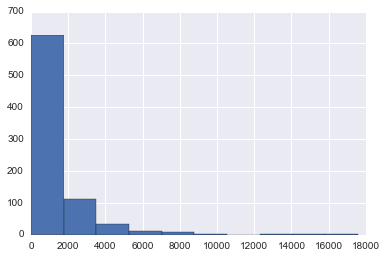

In [283]:
plt.hist(cancellations["Arrival Cancellations"])

(array([ 628.,  108.,   36.,   15.,    8.,    3.,    0.,    3.,    2.,    2.]),
 array([     0. ,   1661.8,   3323.6,   4985.4,   6647.2,   8309. ,
          9970.8,  11632.6,  13294.4,  14956.2,  16618. ]),
 <a list of 10 Patch objects>)

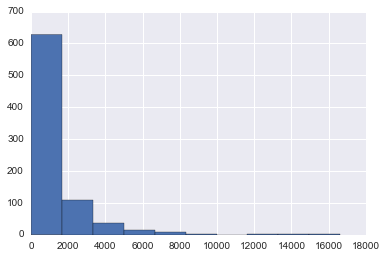

In [284]:
plt.hist(cancellations["Departure Cancellations"])

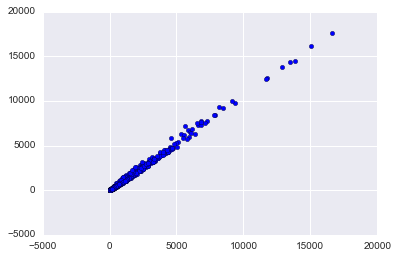

In [285]:
plt.scatter(cancellations["Departure Cancellations"], cancellations["Arrival Cancellations"])

(array([  73.,   73.,   74.,   74.,   74.,   73.,   73.,   73.,   73.,  145.]),
 array([ 2004.,  2005.,  2006.,  2007.,  2008.,  2009.,  2010.,  2011.,
         2012.,  2013.,  2014.]),
 <a list of 10 Patch objects>)

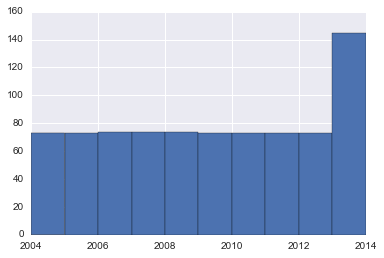

In [286]:
plt.hist(cancellations["Year"])

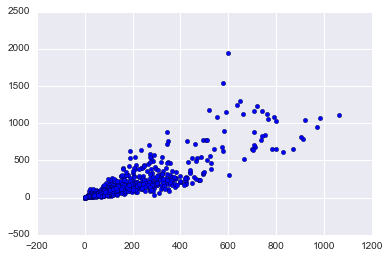

In [287]:
plt.scatter(cancellations['Departure Diversions'], cancellations['Arrival Diversions'])

(array([ 396.,  186.,  105.,   52.,   28.,   10.,   13.,    8.,    4.,    3.]),
 array([    0. ,   106.4,   212.8,   319.2,   425.6,   532. ,   638.4,
          744.8,   851.2,   957.6,  1064. ]),
 <a list of 10 Patch objects>)

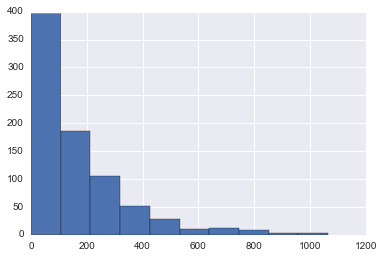

In [288]:
plt.hist(cancellations['Departure Diversions'])

(array([ 610.,  112.,   34.,   23.,    8.,   11.,    5.,    1.,    0.,    1.]),
 array([    0. ,   194.8,   389.6,   584.4,   779.2,   974. ,  1168.8,
         1363.6,  1558.4,  1753.2,  1948. ]),
 <a list of 10 Patch objects>)

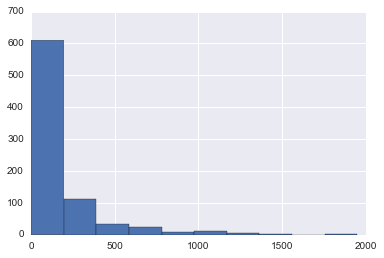

In [289]:
plt.hist(cancellations['Arrival Diversions'])

## SQL joins

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///starter_code.sqlite

u'Connected: None@starter_code.sqlite'

In [4]:
%cd ~/Datasets/Project07/

/Users/christophereppig/Datasets/Project07


In [5]:
%ls

Airport_operations.csv     airports.csv
airport_cancellations.csv


In [12]:
airports.columns

Index([u'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')

In [30]:
len(airports.columns)

13

In [10]:
sqlite_db = 'starter_code.sqlite'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()

In [33]:
airports.columns

Index([u'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')

In [34]:
c.execute("drop table airports;")
conn.commit()

In [36]:
create_airports = """CREATE TABLE airports (key varchar, LocID varchar, ap_name varchar, 
                alias varchar, facility_type varchar, faa_region varchar, country varchar, 
                city varchar, state varchar, ap_type varchar, latitude varchar, 
                longitude varchar, boundary_data_available varchar);"""
c.execute(create_airports)
conn.commit()

In [14]:
operations.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

In [46]:
c.execute("drop table operations;")
conn.commit()

In [47]:
create_operations = """CREATE TABLE operations (airport varchar, year varchar, departures_for_metric_computation varchar,
                    arrivals_for_metric_computation varchar, percent_on_time_gate_departures varchar, 
                    percent_on_time_airport_departures varchar, percent_on_time_gate_arrivals varchar,
                    average_gate_departure_delay varchar, average_taxi_out_time varchar, average_taxi_out_delay varchar,
                    average_airport_departure_delay varchar, average_airborne_delay varchar, average_taxi_in_delay varchar,
                    average_block_delay varchar, average_gate_arrival_delay varchar);"""
c.execute(create_operations)
conn.commit()

In [16]:
cancellations.columns

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

In [140]:
c.execute('drop table if exists cancellations')
create_cancellations = '''CREATE TABLE cancellations (airportid varchar, year varchar, departure_cancellations varchar,
                            arrival_cancellations varchar, departure_diversions varchar, arrival_diversions varchar);'''
c.execute(create_cancellations)
conn.commit()

In [29]:
results = c.execute("SELECT * FROM cancellations;")
results.fetchall()

[]

In [40]:
c.executemany("INSERT INTO airports VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", airports.values)
conn.commit()

In [80]:
c.execute('SELECT * from cancellations limit 1;')


In [41]:
cancellations.columns

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

In [42]:
len(cancellations.columns)

6

In [141]:
c.executemany('INSERT INTO cancellations VALUES (?, ?, ?, ?, ?, ?);', cancellations.values)
conn.commit()

In [44]:
len(operations.columns)

15

In [48]:
c.executemany('INSERT INTO operations VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);', operations.values)
conn.commit()

In [49]:
%%sql

SELECT * FROM cancellations LIMIT 10;

(sqlite3.OperationalError) no such table: cancellations [SQL: u'SELECT * FROM cancellations LIMIT 10;']


In [53]:
c.execute('SELECT * FROM cancellations LIMIT 10;').fetchall()


[(u'ABQ', u'2004.0', u'242.0', u'235.0', u'71.0', u'46.0'),
 (u'ABQ', u'2005.0', u'221.0', u'190.0', u'61.0', u'33.0'),
 (u'ABQ', u'2006.0', u'392.0', u'329.0', u'71.0', u'124.0'),
 (u'ABQ', u'2007.0', u'366.0', u'304.0', u'107.0', u'45.0'),
 (u'ABQ', u'2008.0', u'333.0', u'300.0', u'79.0', u'42.0'),
 (u'ABQ', u'2009.0', u'192.0', u'162.0', u'74.0', u'26.0'),
 (u'ABQ', u'2010.0', u'222.0', u'177.0', u'71.0', u'50.0'),
 (u'ABQ', u'2011.0', u'345.0', u'294.0', u'77.0', u'61.0'),
 (u'ABQ', u'2012.0', u'237.0', u'181.0', u'65.0', u'60.0'),
 (u'ABQ', u'2013.0', u'232.0', u'212.0', u'62.0', u'46.0')]

In [56]:
operations.head(1)

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                            0.803   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   

   average taxi out delay  average airport departure delay  \
0                    2.43                             12.1   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   

   average gate arrival delay  
0                       10.87

In [122]:
cancellations.head(1)

Airport    Year  Departure Cancellations  Arrival Cancellations  \
0     ABQ  2004.0                    242.0                  235.0   

   Departure Diversions  Arrival Diversions  
0                  71.0                46.0

In [58]:
airports.head(1)

Key LocID          AP_NAME                          ALIAS Facility Type  \
0  3443.0   STX  HENRY E ROHLSEN  Henry E Rohlsen Int'l Airport       Airport   

  FAA REGION            COUNTY           CITY STATE     AP Type   Latitude  \
0        ASO  -VIRGIN ISLANDS-  CHRISTIANSTED    VI  Public Use  17.701556   

   Longitude Boundary Data Available  
0 -64.801722                     Yes

In [138]:
c.execute("select * from cancellations limit 1").fetchall()

[(u'ABQ', u'2004.0', u'242.0', u'235.0', u'71.0', u'46.0')]

In [145]:
join = c.execute("""SELECT * 
        FROM operations 
        INNER JOIN cancellations 
        ON 
        cancellations.airportid = operations.airport 
        AND 
        cancellations.year = operations.year 
        INNER JOIN airports 
        ON 
        airports.LocID = operations.airport;

""")


airport_data = join.fetchall()

In [146]:
airport_data = pd.DataFrame(airport_data)

In [172]:
airport_data.head()

airport  year departures for metric computation  \
0     ABQ  2004                             53971   
1     ABQ  2005                             51829   
2     ABQ  2006                             49682   
3     ABQ  2007                             53255   
4     ABQ  2008                             49589   

  arrivals for metric computation percent on-time gate departures  \
0                           53818                           0.803   
1                           51877                           0.814   
2                           51199                          0.7983   
3                           53611                          0.8005   
4                           49512                          0.8103   

  percent on-time airport departures percent on-time gate arrivals  \
0                             0.7809                        0.7921   
1                             0.7922                        0.8001   
2                             0.7756                        0.7746   
3                             0.7704                        0.7647   
4                             0.7844                        0.7875   

  average_gate_departure_delay average_taxi_out_time average taxi out delay  \
0                        10.38                  9.89                   2.43   
1                          9.6                  9.79                   2.29   
2                        10.84                  9.89                   2.16   
3                        11.29                 10.34                    2.4   
4                        10.79                 10.41                   2.41   

            ...                                ALIAS Facility Type FAA REGION  \
0           ...            Albuquerque Int'l Sunport       Airport        ASW   
1           ...            Albuquerque Int'l Sunport       Airport        ASW   
2           ...            Albuquerque Int'l Sunport       Airport        ASW   
3           ...            Albuquerque Int'l Sunport       Airport        ASW   
4           ...            Albuquerque Int'l Sunport       Airport        ASW   

       COUNTY         CITY STATE                 AP Type   Latitude  \
0  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial  35.040194   
1  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial  35.040194   
2  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial  35.040194   
3  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial  35.040194   
4  BERNALILLO  ALBUQUERQUE    NM  Federalized/Commercial  35.040194   

     Longitude Boundary Data Available  
0  -106.609194                     Yes  
1  -106.609194                     Yes  
2  -106.609194                     Yes  
3  -106.609194                     Yes  
4  -106.609194                     Yes  

[5 rows x 34 columns]

In [170]:
column_names = ['airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', 'Airport', u'Year2', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions', 'Key', u'LocID', u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available']

In [171]:
airport_data.columns = column_names

In [177]:
airport_data.to_csv('all_airport_data.csv', encoding='utf-8')

In [178]:
airport_data.shape

(799, 34)

## Exploratory analysis on full dataset

In [179]:
%pwd

u'/Users/christophereppig/Datasets/Project07'

In [180]:
%ls

Airport_operations.csv     all_airport_data.csv
airport_cancellations.csv  starter_code.sqlite
airports.csv


In [181]:
all_airport = pd.read_csv('all_airport_data.csv')

In [182]:
all_airport.head()

Unnamed: 0 airport  year  departures for metric computation  \
0           0     ABQ  2004                              53971   
1           1     ABQ  2005                              51829   
2           2     ABQ  2006                              49682   
3           3     ABQ  2007                              53255   
4           4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

            ...                                 ALIAS  Facility Type  \
0           ...             Albuquerque Int'l Sunport        Airport   
1           ...             Albuquerque Int'l Sunport        Airport   
2           ...             Albuquerque Int'l Sunport        Airport   
3           ...             Albuquerque Int'l Sunport        Airport   
4           ...             Albuquerque Int'l Sunport        Airport   

   FAA REGION      COUNTY         CITY  STATE                 AP Type  \
0         ASW  BERNALILLO  ALBUQUERQUE     NM  Federalized/Commercial   
1         ASW  BERNALILLO  ALBUQUERQUE     NM  Federalized/Commercial   
2         ASW  BERNALILLO  ALBUQUERQUE     NM  Federalized/Commercial   
3         ASW  BERNALILLO  ALBUQUERQUE     NM  Federalized/Commercial   
4         ASW  BERNALILLO  ALBUQUERQUE     NM  Federalized/Commercial   

    Latitude   Longitude  Boundary Data Available  
0  35.040194 -106.609194                      Yes  
1  35.040194 -106.609194                      Yes  
2  35.040194 -106.609194                      Yes  
3  35.040194 -106.609194                      Yes  
4  35.040194 -106.609194                      Yes  

[5 rows x 35 columns]

In [183]:
all_airport.shape

(799, 35)

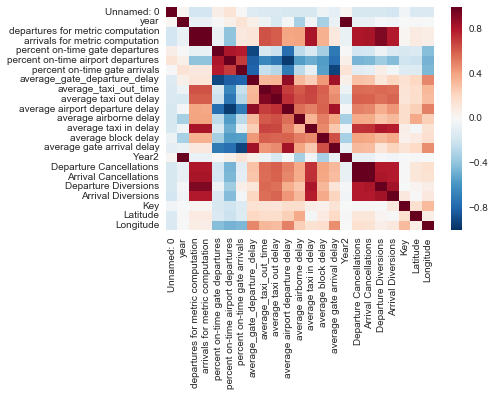

In [184]:
sns.heatmap(all_airport.corr())

In [186]:
all_airport.dtypes

Unnamed: 0                              int64
airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Airport                                object
Year2                                   int64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                

In [187]:
all_airport.columns

Index([u'Unnamed: 0', u'airport', u'year',
       u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'Airport',
       u'Year2', u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions', u'Key', u'LocID',
       u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION', u'COUNTY',
       u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')

In [191]:
## can drop this column
all_airport['Boundary Data Available'].value_counts()

Yes    799
Name: Boundary Data Available, dtype: int64

In [192]:
# can drop this column
all_airport['Facility Type'].value_counts()

Airport    799
Name: Facility Type, dtype: int64

In [193]:
## can also drop year2

In [194]:
all_airport.isnull().sum()

Unnamed: 0                            0
airport                               0
year                                  0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
Airport                               0
Year2                                 0
Departure Cancellations               0
Arrival Cancellations                 0
Departure Diversions                  0
Arrival Diversions                    0
Key                                   0
LocID                                 0
AP_NAME                               0


In [196]:
all_airport['year'].dtypes

dtype('int64')

In [206]:
## dummy these out?
all_airport['STATE'].value_counts()

CA    122
FL     77
NY     66
TX     66
IL     28
PA     22
TN     22
KY     22
NC     22
AZ     22
OH     22
HI     22
MO     22
DC     22
NJ     11
NM     11
NH     11
LA     11
NE     11
WI     11
OR     11
NV     11
PR     11
RI     11
CO     11
AK     11
AL     11
GA     11
IN     11
CT     11
MD     11
MA     11
UT     11
MN     11
MI     11
WA     11
Name: STATE, dtype: int64

In [205]:
## dummy these out
all_airport['FAA REGION'].value_counts()

AWP    177
ASO    176
AEA    132
AGL     94
ASW     88
ANM     44
ANE     44
ACE     33
AAL     11
Name: FAA REGION, dtype: int64

In [207]:
all_airport['AP Type'].value_counts()

Federalized/Commercial    748
Public Use                 51
Name: AP Type, dtype: int64

In [217]:
all_airport.columns

Index([u'Unnamed: 0', u'airport', u'year',
       u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay', u'Airport',
       u'Year2', u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions', u'Key', u'LocID',
       u'AP_NAME', u'ALIAS', u'Facility Type', u'FAA REGION', u'COUNTY',
       u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude',
       u'Boundary Data Available'],
      dtype='object')

In [219]:
all_airport.drop('Year2', axis=1, inplace=True)

In [220]:
all_airport.drop('Facility Type', axis=1, inplace=True)

In [221]:
all_airport.drop('Boundary Data Available', axis=1, inplace=True)

In [222]:
all_airport.drop('ALIAS', axis=1, inplace=True)

In [223]:
all_airport.drop('Key', axis=1, inplace=True)

In [225]:
all_airport.drop('LocID', axis=1, inplace=True)

In [229]:
all_airport.drop('Airport', axis=1, inplace=True)

In [241]:
all_airport.drop('Unnamed: 0', axis=1, inplace=True)

In [243]:
all_airport.drop('AP_NAME', axis=1, inplace=True)

In [247]:
all_airport.drop('COUNTY', axis=1, inplace=True)

In [248]:
all_airport.drop('CITY', axis=1, inplace=True)

In [227]:
pd.set_option("display.max_columns", 100)

In [257]:
pd.set_option("display.max_rows", 100)

In [249]:
all_airport.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  Departure Cancellations  Arrival Cancellations  \
0                       10.87                    242.0                  235.0   
1                       10.24                    221.0                  190.0   
2                       11.82                    392.0                  329.0   
3                       12.71                    366.0                  304.0   
4                       11.48                    333.0                  300.0   

   Departure Diversions  Arrival Diversions FAA REGION STATE  \
0                  71.0                46.0        ASW    NM   
1                  61.0                33.0        ASW    NM   
2                  71.0               124.0        ASW    NM   
3                 107.0                45.0        ASW    NM   
4                  79.0                42.0        ASW    NM   

                  AP Type   Latitude   Longitude  is_ANE  is_AGL  is_ASW  \
0  Federalized/Commercial  35.040194 -106.609194       0       0       1   
1  Federalized/Commercial  35.040194 -106.609194       0       0       1   
2  Federalized/Commercial  35.040194 -106.609194       0       0       1   
3  Federalized/Commercial  35.040194 -106.609194       0       0       1   
4  Federalized/Commercial  35.040194 -106.609194       0       0       1   

   is_ACE  is_AAL  is_AWP  is_AEA  is_ANM  is_ASO  public_use  in_WA  in_DC  \
0       0       0       0       0       0       0           0      0      0   
1       0       0       0       0       0       0           0      0      0   
2       0       0       0       0       0       0           0      0      0   
3       0  

In [231]:
all_airport.shape

(799, 28)

## Making Features

In [208]:
region = all_airport['FAA REGION']

In [212]:
regions = list(set(list(region)))

In [232]:
regions

['ANE', 'AGL', 'ASW', 'ACE', 'AAL', 'AWP', 'AEA', 'ANM', 'ASO']

In [233]:
for i in regions:
    all_airport['is_'+i] = all_airport['FAA REGION'].apply(lambda x: 1 if i == x else 0)

In [236]:
all_airport['public_use'] = all_airport['AP Type'].apply(lambda x: 1 if x=="Public Use" else 0)

In [237]:
states = list(set(list(all_airport['STATE'])))

In [238]:
for i in states:
    all_airport['in_'+i] = all_airport['STATE'].apply(lambda x: 1 if i == x else 0)

In [250]:
all_airport.head()

airport  year  departures for metric computation  \
0     ABQ  2004                              53971   
1     ABQ  2005                              51829   
2     ABQ  2006                              49682   
3     ABQ  2007                              53255   
4     ABQ  2008                              49589   

   arrivals for metric computation  percent on-time gate departures  \
0                            53818                           0.8030   
1                            51877                           0.8140   
2                            51199                           0.7983   
3                            53611                           0.8005   
4                            49512                           0.8103   

   percent on-time airport departures  percent on-time gate arrivals  \
0                              0.7809                         0.7921   
1                              0.7922                         0.8001   
2                              0.7756                         0.7746   
3                              0.7704                         0.7647   
4                              0.7844                         0.7875   

   average_gate_departure_delay  average_taxi_out_time  \
0                         10.38                   9.89   
1                          9.60                   9.79   
2                         10.84                   9.89   
3                         11.29                  10.34   
4                         10.79                  10.41   

   average taxi out delay  average airport departure delay  \
0                    2.43                            12.10   
1                    2.29                            11.20   
2                    2.16                            12.33   
3                    2.40                            12.95   
4                    2.41                            12.32   

   average airborne delay  average taxi in delay  average block delay  \
0                    2.46                   0.83                 2.55   
1                    2.26                   0.89                 2.34   
2                    2.12                   0.84                 2.66   
3                    2.19                   1.29                 3.06   
4                    1.82                   1.03                 2.79   

   average gate arrival delay  Departure Cancellations  Arrival Cancellations  \
0                       10.87                    242.0                  235.0   
1                       10.24                    221.0                  190.0   
2                       11.82                    392.0                  329.0   
3                       12.71                    366.0                  304.0   
4                       11.48                    333.0                  300.0   

   Departure Diversions  Arrival Diversions FAA REGION STATE  \
0                  71.0                46.0        ASW    NM   
1                  61.0                33.0        ASW    NM   
2                  71.0               124.0        ASW    NM   
3                 107.0                45.0        ASW    NM   
4                  79.0                42.0        ASW    NM   

                  AP Type   Latitude   Longitude  is_ANE  is_AGL  is_ASW  \
0  Federalized/Commercial  35.040194 -106.609194       0       0       1   
1  Federalized/Commercial  35.040194 -106.609194       0       0       1   
2  Federalized/Commercial  35.040194 -106.609194       0       0       1   
3  Federalized/Commercial  35.040194 -106.609194       0       0       1   
4  Federalized/Commercial  35.040194 -106.609194       0       0       1   

   is_ACE  is_AAL  is_AWP  is_AEA  is_ANM  is_ASO  public_use  in_WA  in_DC  \
0       0       0       0       0       0       0           0      0      0   
1       0       0       0       0       0       0           0      0      0   
2       0       0       0       0       0       0           0      0      0   
3       0  

## PCA

In [258]:
all_airport.dtypes

airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
FAA REGION                             object
STATE                                  object
AP Type                           

In [253]:
all_airport.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions', u'FAA REGION', u'STATE',
       u'AP Type', u'Latitude', u'Longitude', u'is_ANE', u'is_AGL', u'is_ASW',
       u'is_ACE', u'is_AAL', u'is_AWP', u'is_AEA', u'is_ANM', u'is_ASO',
       u'public_use', u'in_WA', u'in_DC', u'in_WI', u'in_HI', u'in_FL',
       u'in_NH', u'in_NJ', u'in_NM', u'in_TX', u'in_LA', u'in_NC', u'in_NE',
       u'in_TN', u'in_NY', u'in_PA', u'in_CA', u'in_NV', u'in_PR', u'in_CO'

In [254]:
y = all_airport[['percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions']]

In [281]:
x = all_airport[['Latitude', 'Longitude', u'is_ANE', u'is_AGL', u'is_ASW',
       u'is_ACE', u'is_AAL', u'is_AWP', u'is_AEA', u'is_ANM', u'is_ASO',
       u'public_use', u'in_WA', u'in_DC', u'in_WI', u'in_HI', u'in_FL',
       u'in_NH', u'in_NJ', u'in_NM', u'in_TX', u'in_LA', u'in_NC', u'in_NE',
       u'in_TN', u'in_NY', u'in_PA', u'in_CA', u'in_NV', u'in_PR', u'in_CO',
       u'in_AK', u'in_AL', u'in_IL', u'in_GA', u'in_IN', u'in_AZ', u'in_CT',
       u'in_MD', u'in_MA', u'in_OH', u'in_UT', u'in_MO', u'in_MN', u'in_MI',
       u'in_RI', u'in_KY', u'in_OR', 'year', 'departures for metric computation']].copy()

In [261]:
SS = StandardScaler()

In [262]:
y_standard = SS.fit_transform(y)

In [282]:
x_standard = SS.fit_transform(x)

In [321]:
airport_standard = SS.fit_transform(all_airport[['percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions', 
       'Latitude', 'Longitude', u'is_ANE', u'is_AGL', u'is_ASW',
       u'is_ACE', u'is_AAL', u'is_AWP', u'is_AEA', u'is_ANM', u'is_ASO',
       u'public_use', u'in_WA', u'in_DC', u'in_WI', u'in_HI', u'in_FL',
       u'in_NH', u'in_NJ', u'in_NM', u'in_TX', u'in_LA', u'in_NC', u'in_NE',
       u'in_TN', u'in_NY', u'in_PA', u'in_CA', u'in_NV', u'in_PR', u'in_CO',
       u'in_AK', u'in_AL', u'in_IL', u'in_GA', u'in_IN', u'in_AZ', u'in_CT',
       u'in_MD', u'in_MA', u'in_OH', u'in_UT', u'in_MO', u'in_MN', u'in_MI',
       u'in_RI', u'in_KY', u'in_OR', 'year', 'departures for metric computation']].copy())

In [317]:
def skree_plot(data):
    cov_mat = np.cov(data.T)
    eigenValues, eigenVectors = np.linalg.eig(cov_mat)
    eigenValSum = sum(eigenValues)
    varianceExplained = [(i/eigenValSum)*100 for i in sorted(eigenValues, reverse=True)]
    cumulativeVarianceexplained = np.cumsum(varianceExplained)
    plt.plot(range(1,len(varianceExplained)+1), varianceExplained)
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Explained")
    plt.title("Variance Explained by Each Component")
    plt.show()
    plt.plot(range(1,len(cumulativeVarianceexplained)+1), cumulativeVarianceexplained)
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Cumulative Variance Explained")
    plt.title("Cumulative Variance Explained by Each Component")
    plt.show()

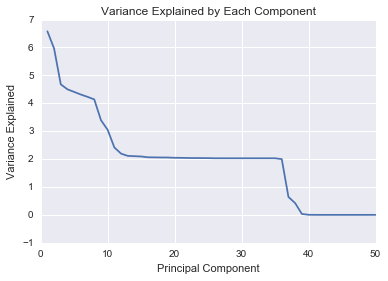

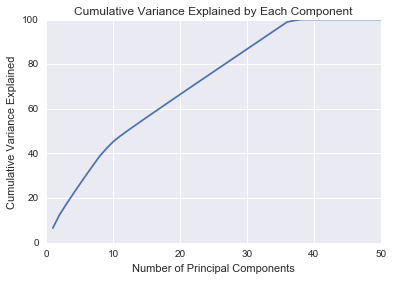

In [318]:
skree_plot(x_standard)

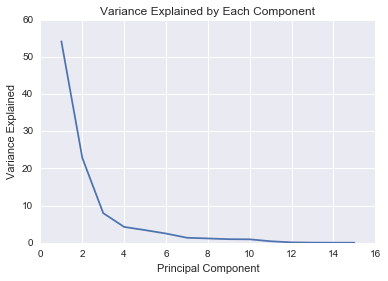

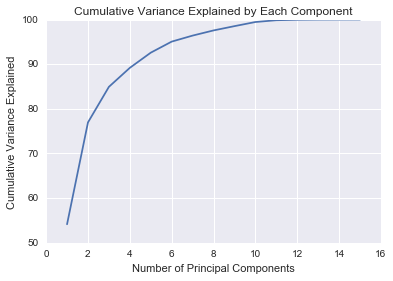

In [319]:
skree_plot(y_standard)

In [326]:
pca2 = PCA(n_components=2)
ypcas = pca2.fit_transform(y_standard)

ypcas = pd.DataFrame(ypcas, columns=['ypca1', 'ypca2'])

In [327]:
ypcas.head()

ypca1     ypca2
0 -2.547507 -0.077426
1 -2.986095 -0.385382
2 -2.253690  0.125673
3 -1.777547  0.240781
4 -2.409331 -0.089220

In [331]:
y_standard = pd.DataFrame(y_standard, columns=[y.columns])

In [332]:
delays = pd.concat([y_standard, ypcas], axis=1)

In [333]:
delays.head()

percent on-time gate departures  percent on-time airport departures  \
0                         0.457014                            0.709963   
1                         0.667555                            0.858688   
2                         0.367055                            0.640207   
3                         0.409163                            0.571768   
4                         0.596737                            0.756029   

   percent on-time gate arrivals  average_gate_departure_delay  \
0                       0.500021                     -0.827217   
1                       0.658531                     -1.084255   
2                       0.153280                     -0.675630   
3                      -0.042876                     -0.527339   
4                       0.408878                     -0.692107   

   average_taxi_out_time  average taxi out delay  \
0              -1.047069               -0.536544   
1              -1.073359               -0.596479   
2              -1.047069               -0.652133   
3              -0.928768               -0.549387   
4              -0.910365               -0.545106   

   average airport departure delay  average airborne delay  \
0                        -0.826210               -0.355457   
1                        -1.032562               -0.526543   
2                        -0.773476               -0.646303   
3                        -0.631323               -0.586423   
4                        -0.775769               -0.902931   

   average taxi in delay  average block delay  average gate arrival delay  \
0              -0.683889            -0.749327                   -0.787421   
1              -0.613645            -0.961737                   -0.981290   
2              -0.672181            -0.638065                   -0.495078   
3              -0.145352            -0.233475                   -0.221199   
4              -0.449742            -0.506573                   -0.599706   

   Departure Cancellations  Arrival Cancellations  Departure Diversions  \
0                -0.574713              -0.558841             -0.598447   
1                -0.586128              -0.581577             -0.656408   
2                -0.493179              -0.511347             -0.598447   
3                -0.507312              -0.523979             -0.389788   
4                -0.525249              -0.526000             -0.552079   

   Arrival Diversions     ypca1     ypca2  
0           -0.542560 -2.547507 -0.077426  
1           -0.599323 -2.986095 -0.385382  
2           -0.201977 -2.253690  0.125673  
3           -0.546926 -1.777547  0.240781  
4           -0.560025 -2.409331 -0.089220

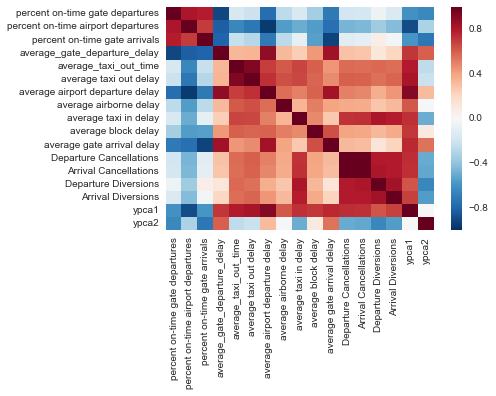

In [334]:
sns.heatmap(delays.corr())

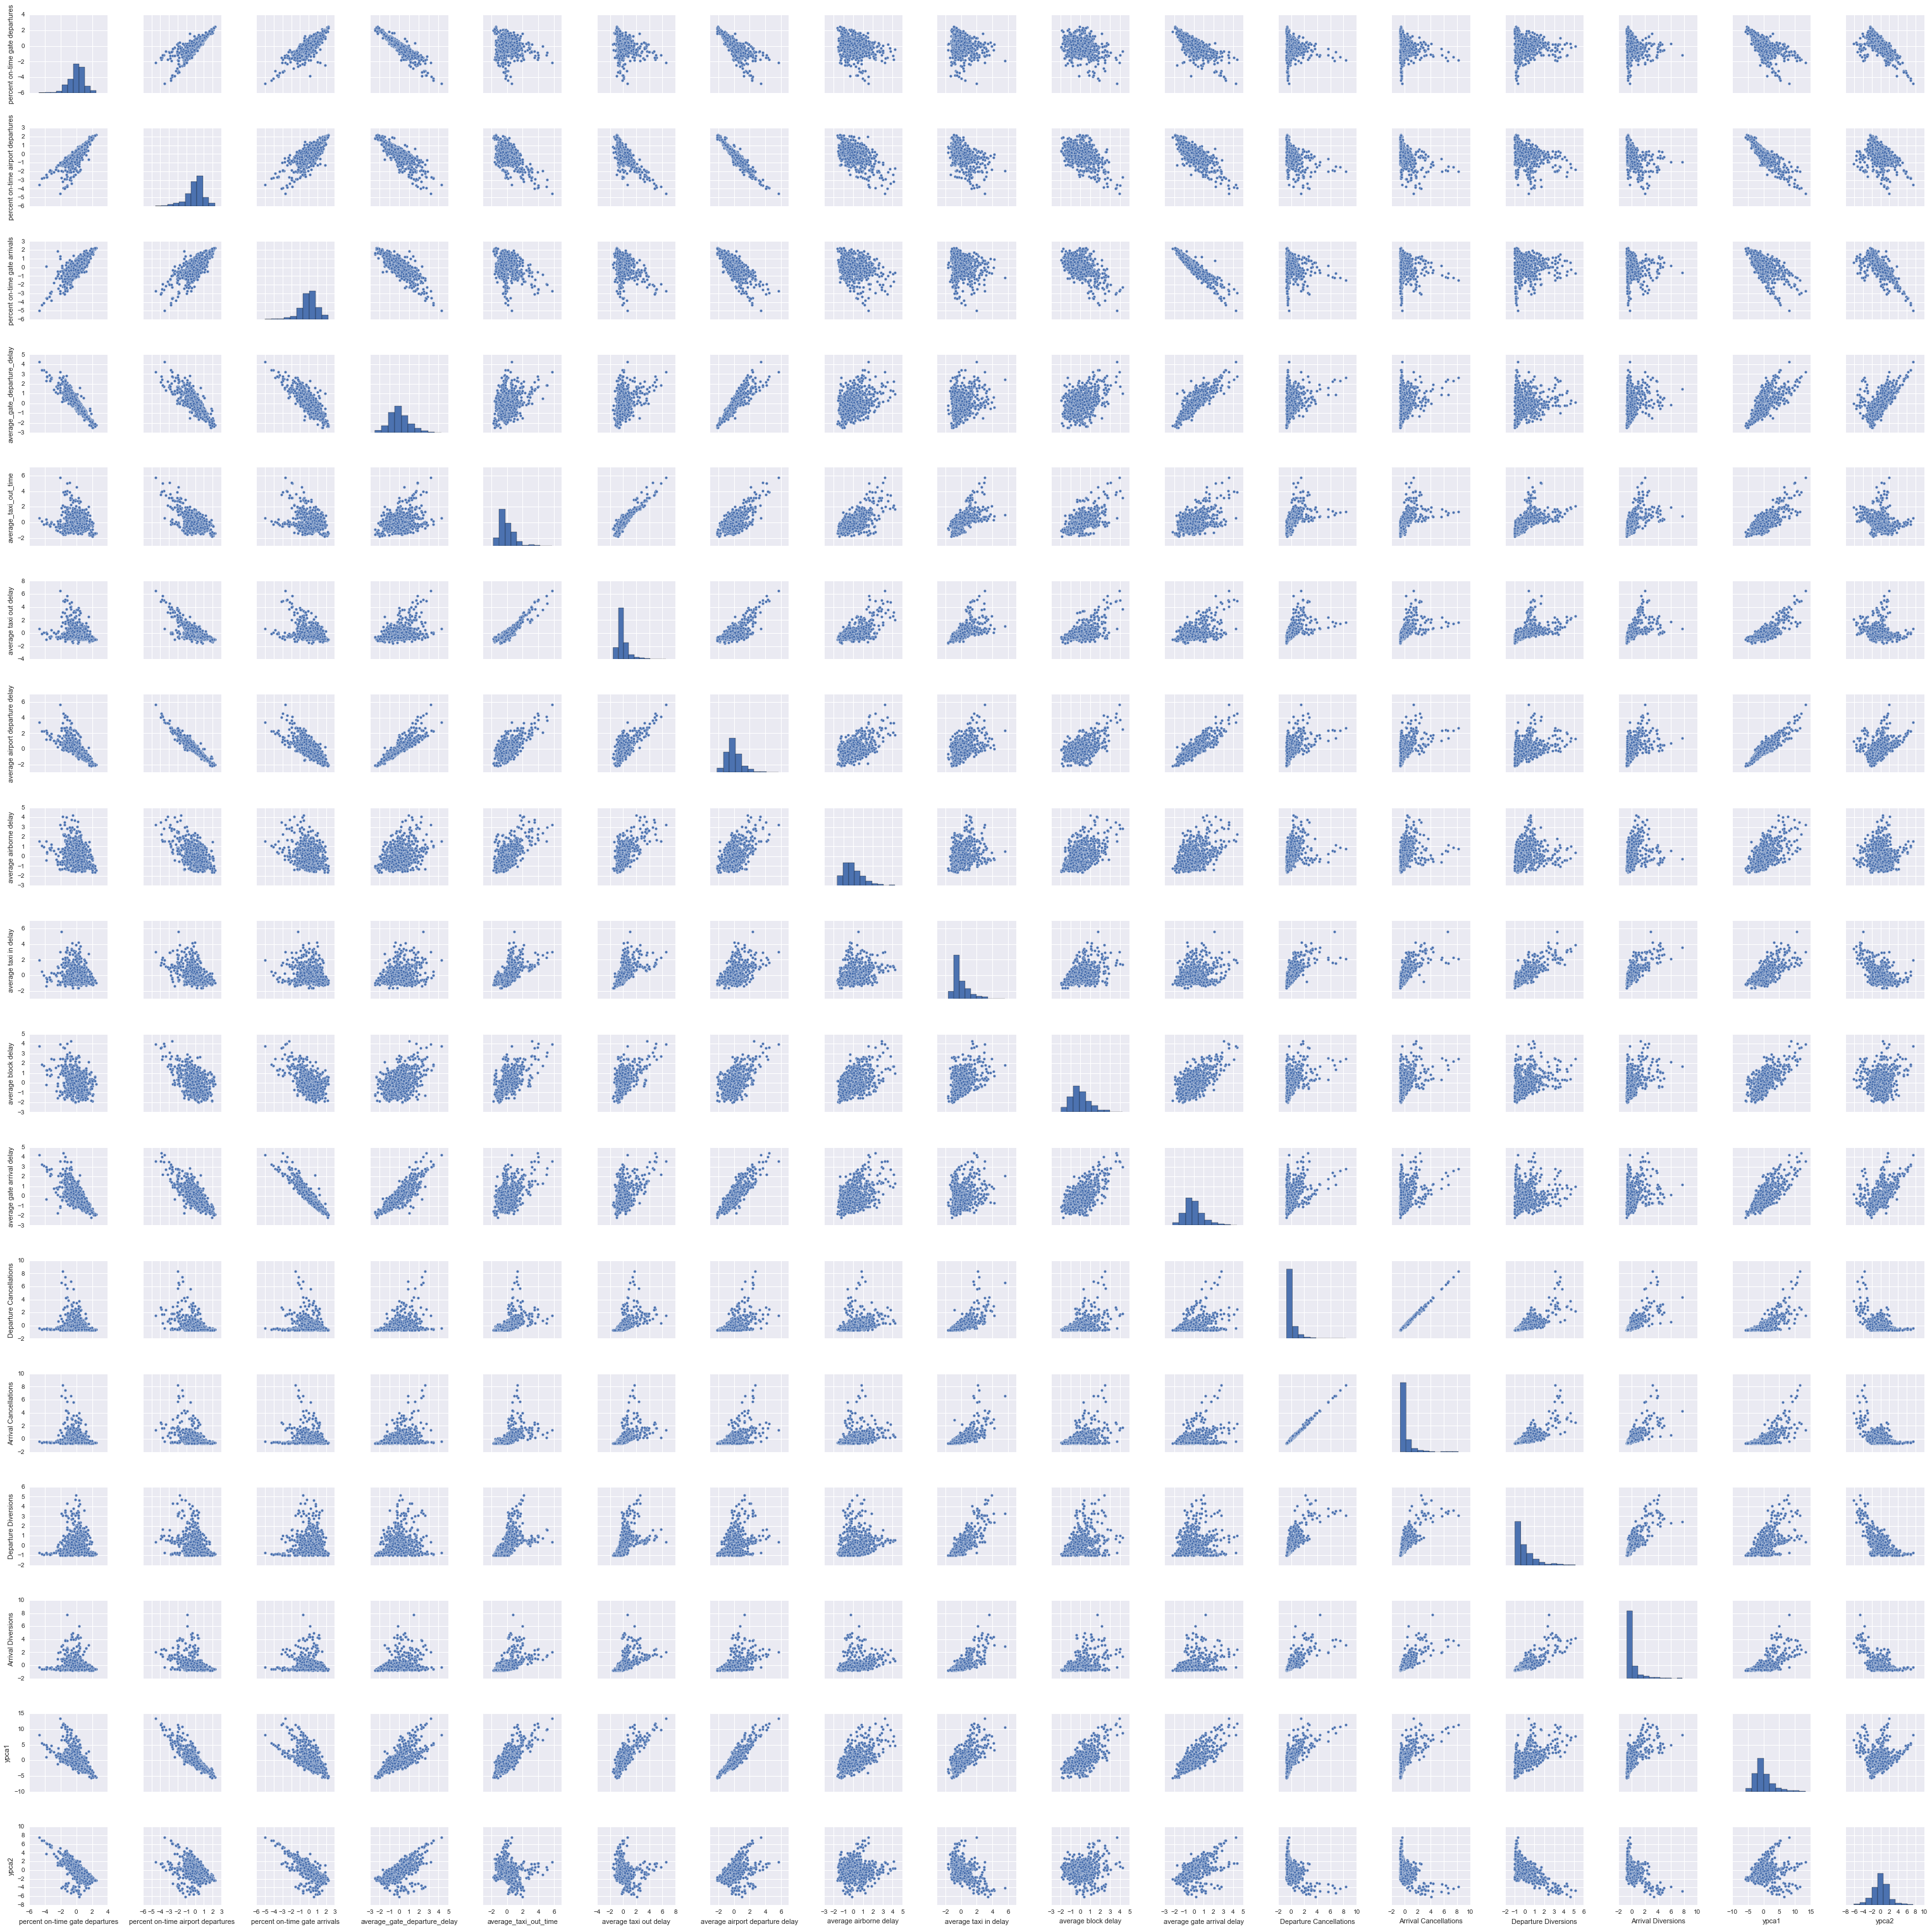

In [388]:
sns.pairplot(delays)

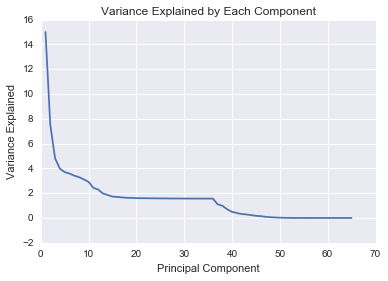

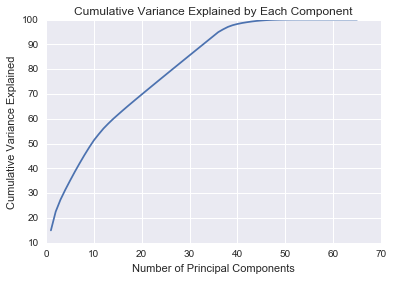

In [322]:
skree_plot(airport_standard)

## Modeling

In [335]:
model_y = delays['ypca1']

In [362]:
x_standard = pd.DataFrame(x_standard, columns=[x.columns])

In [365]:
model_y = pd.DataFrame(model_y, columns=['ypca1'])

In [366]:
x_train, x_test, y_train, y_test = train_test_split(x_standard, model_y)

In [360]:
type(x_train)

numpy.ndarray

In [341]:
rfr = RandomForestRegressor()

In [342]:
RandomForestRegressor?

In [343]:
parameters = {
    "n_estimators" : [10, 25, 50, 100, 500],
    "max_depth" : [2,3,5,7,10, None],
    "max_features" : [0.25, 0.5, 0.75, 1.0]
}

In [344]:
grid_search = GridSearchCV(estimator=rfr,
                          param_grid=parameters,
                          verbose=10,
                          cv=5)

In [345]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.484761 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.392184 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.3s


[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.386500 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.383719 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.402774 -   0.0s
[CV] max_features=0.25, n_estimators=25, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.447878 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.460023 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.525678 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.497123 -   0.1s
[CV] max_features=0.2

[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.6s


[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.436707 -   0.1s
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.507361 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.446970 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.476110 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................


[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    1.1s


[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.443172 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.444617 -   0.2s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.497791 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.483642 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................


[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    2.4s


[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.458119 -   2.3s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.462240 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.485752 -   0.3s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.467639 -   1.5s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.478358 -   1.6s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.483853 -   1.7s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.490623 -   1.6s
[CV] max_featu

[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:   12.0s


[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.478656 -   1.6s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.595077 -   0.0s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.526288 -   0.0s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.572176 -   0.0s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.583364 -   0.0s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.511119 -   0.0s
[CV] max_features=0.5, n_estimators=25, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=25, max_depth=2, score=0.592210 -   0.1s
[CV] max_features=0.5, n_e

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   13.8s


[CV]  max_features=0.5, n_estimators=25, max_depth=2, score=0.626032 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=25, max_depth=2, score=0.533344 -   0.1s
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.585100 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.533988 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.589937 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.586096 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.503095 -   0.2s
[CV] max_features=0.5, n_est

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:   15.0s


[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.590522 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.539920 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.596395 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.600878 -   0.5s
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.533586 -   0.3s
[CV] max_features=0.5, n_estimators=500, max_depth=2 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=2, score=0.594582 -   1.8s
[CV] max_features=0.5, n_estimators=500, max_depth=2 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=2, score=0.541915 -   1.6s
[CV] max_features=0.5

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   23.9s


[CV]  max_features=0.5, n_estimators=500, max_depth=2, score=0.536990 -   1.7s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.625587 -   0.0s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.528101 -   0.0s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.607873 -   0.0s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.616497 -   0.0s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.508819 -   0.0s
[CV] max_features=0.75, n_estimators=25, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=25, max_depth=2, score=0.620668 -   0.1s
[CV] max_features=0.7

[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:   26.2s


[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.624880 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.521788 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.613275 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.625998 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.533448 -   0.1s
[CV] max_features=0.75, n_estimators=100, max_depth=2 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=2, score=0.630107 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=2 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=2, score=0.531769 -   0.3s
[CV] max_features=0

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:   30.7s


[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.536908 -   2.0s
[CV] max_features=0.75, n_estimators=500, max_depth=2 ................
[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.597125 -   1.7s
[CV] max_features=0.75, n_estimators=500, max_depth=2 ................
[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.625267 -   1.8s
[CV] max_features=0.75, n_estimators=500, max_depth=2 ................
[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.538248 -   1.8s
[CV] max_features=1.0, n_estimators=10, max_depth=2 ..................
[CV]  max_features=1.0, n_estimators=10, max_depth=2, score=0.626922 -   0.0s
[CV] max_features=1.0, n_estimators=10, max_depth=2 ..................
[CV]  max_features=1.0, n_estimators=10, max_depth=2, score=0.478239 -   0.0s
[CV] max_features=1.0, n_estimators=10, max_depth=2 ..................
[CV]  max_features=1.0, n_estimators=10, max_depth=2, score=0.538398 -   0.0s
[CV] max_features=1.

[Parallel(n_jobs=1)]: Done  84 tasks       | elapsed:   38.6s


[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.634764 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................
[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.516459 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................
[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.549830 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................
[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.612925 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................
[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.517912 -   0.2s
[CV] max_features=1.0, n_estimators=100, max_depth=2 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=2, score=0.628695 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=2 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=2, score=0.529664 -   0.5s
[CV] max_features=1.0, n_e

[Parallel(n_jobs=1)]: Done  97 tasks       | elapsed:   45.8s


[CV]  max_features=1.0, n_estimators=500, max_depth=2, score=0.566924 -   1.9s
[CV] max_features=1.0, n_estimators=500, max_depth=2 .................
[CV]  max_features=1.0, n_estimators=500, max_depth=2, score=0.617914 -   1.8s
[CV] max_features=1.0, n_estimators=500, max_depth=2 .................
[CV]  max_features=1.0, n_estimators=500, max_depth=2, score=0.524381 -   1.9s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.586608 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.581404 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.568529 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.592679 -   0.0s
[CV] max_features=0.2

[Parallel(n_jobs=1)]: Done 112 tasks       | elapsed:   52.3s


[CV]  max_features=0.25, n_estimators=50, max_depth=3, score=0.565703 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=3 .................
[CV]  max_features=0.25, n_estimators=50, max_depth=3, score=0.600873 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=3 .................
[CV]  max_features=0.25, n_estimators=50, max_depth=3, score=0.581156 -   0.2s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.621160 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.586250 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.601814 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.578112 -   0.3s
[CV] max_features

[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:  1.0min


[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.709784 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................
[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.625459 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................
[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.621941 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................
[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.670131 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................
[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.621662 -   0.1s
[CV] max_features=0.5, n_estimators=50, max_depth=3 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=3, score=0.717745 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=3 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=3, score=0.646560 -   0.2s
[CV] max_features=0.5, n_est

[Parallel(n_jobs=1)]: Done 144 tasks       | elapsed:  1.1min


[CV]  max_features=0.5, n_estimators=100, max_depth=3, score=0.636690 -   0.4s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.719187 -   1.6s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.644177 -   1.5s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.652965 -   1.7s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.679251 -   1.6s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.637374 -   1.5s
[CV] max_features=0.75, n_estimators=10, max_depth=3 .................
[CV]  max_features=0.75, n_estimators=10, max_depth=3, score=0.742297 -   0.0s
[CV] max_features=0.7

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  1.2min


[CV]  max_features=0.75, n_estimators=50, max_depth=3, score=0.640379 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=3 .................
[CV]  max_features=0.75, n_estimators=50, max_depth=3, score=0.705876 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=3 .................
[CV]  max_features=0.75, n_estimators=50, max_depth=3, score=0.622068 -   0.2s
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.757430 -   0.3s
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.646747 -   0.3s
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.646967 -   0.3s
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.701766 -   0.3s
[CV] max_features

[Parallel(n_jobs=1)]: Done 180 tasks       | elapsed:  1.4min


[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.769378 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................
[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.630288 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................
[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.620230 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................
[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.721075 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................
[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.621080 -   0.1s
[CV] max_features=1.0, n_estimators=50, max_depth=3 ..................
[CV]  max_features=1.0, n_estimators=50, max_depth=3, score=0.776092 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=3 ..................
[CV]  max_features=1.0, n_estimators=50, max_depth=3, score=0.643691 -   0.2s
[CV] max_features=1.0, n_est

[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  1.6min


[CV]  max_features=1.0, n_estimators=500, max_depth=3, score=0.628895 -   1.7s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.817407 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.717470 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.634386 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.726549 -   0.0s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................
[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.732512 -   0.0s
[CV] max_features=0.25, n_estimators=25, max_depth=5 .................
[CV]  max_features=0.25, n_estimators=25, max_depth=5, score=0.794613 -   0.1s
[CV] max_features=0.2

[Parallel(n_jobs=1)]: Done 220 tasks       | elapsed:  1.7min


[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.785348 -   1.8s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.735324 -   1.6s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.704982 -   1.8s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.746075 -   1.7s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.736382 -   1.6s
[CV] max_features=0.5, n_estimators=10, max_depth=5 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=5, score=0.856374 -   0.0s
[CV] max_features=0.5, n_estimators=10, max_depth=5 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=5, score=0.770354 -   0.0s
[CV] max_features=

[Parallel(n_jobs=1)]: Done 241 tasks       | elapsed:  1.9min


[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.778601 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=5 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.713564 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=5 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.797621 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=5 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.770526 -   0.4s
[CV] max_features=0.5, n_estimators=500, max_depth=5 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=5, score=0.850556 -   1.6s
[CV] max_features=0.5, n_estimators=500, max_depth=5 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=5, score=0.776774 -   1.6s
[CV] max_features=0.5, n_estimators=500, max_depth=5 .................
[CV]  max_features=0.5, n_estimators=500, max_depth=5, score=0.706276 -   1.7s
[CV] max_features=0.5

[Parallel(n_jobs=1)]: Done 264 tasks       | elapsed:  2.1min


[CV]  max_features=0.75, n_estimators=50, max_depth=5, score=0.786314 -   0.2s
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.871989 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.782713 -   0.3s
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.706137 -   0.3s
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.815017 -   0.3s
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.781062 -   0.4s
[CV] max_features=0.75, n_estimators=500, max_depth=5 ................
[CV]  max_features=0.75, n_estimators=500, max_depth=5, score=0.871399 -   1.8s
[CV] max_featur

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed:  2.3min


[CV]  max_features=1.0, n_estimators=50, max_depth=5, score=0.713873 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=5 ..................
[CV]  max_features=1.0, n_estimators=50, max_depth=5, score=0.818142 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=5 ..................
[CV]  max_features=1.0, n_estimators=50, max_depth=5, score=0.806257 -   0.2s
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.874201 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.798576 -   0.3s
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.693997 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.816227 -   0.4s
[CV] max_features=1.0, n

[Parallel(n_jobs=1)]: Done 312 tasks       | elapsed:  2.5min


[CV]  max_features=0.25, n_estimators=50, max_depth=7, score=0.821457 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=7 .................
[CV]  max_features=0.25, n_estimators=50, max_depth=7, score=0.799586 -   0.2s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.865858 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.811968 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.746777 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.819865 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.793879 -   0.4s
[CV] max_feature

[Parallel(n_jobs=1)]: Done 337 tasks       | elapsed:  2.7min


[CV]  max_features=0.5, n_estimators=50, max_depth=7, score=0.723663 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=7 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=7, score=0.846514 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=7 ..................
[CV]  max_features=0.5, n_estimators=50, max_depth=7, score=0.812580 -   0.2s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.892677 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.842851 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.722819 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.857360 -   0.4s
[CV] max_features=0.5, n

[Parallel(n_jobs=1)]: Done 364 tasks       | elapsed:  2.9min


[CV]  max_features=0.75, n_estimators=50, max_depth=7, score=0.832939 -   0.2s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.909257 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.850454 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.756044 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.860427 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.825319 -   0.4s
[CV] max_features=0.75, n_estimators=500, max_depth=7 ................
[CV]  max_features=0.75, n_estimators=500, max_depth=7, score=0.906248 -   2.0s
[CV] max_featur

[Parallel(n_jobs=1)]: Done 391 tasks       | elapsed:  3.1min


[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.851710 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=7 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.764548 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=7 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.865369 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=7 .................
[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.843050 -   0.4s
[CV] max_features=1.0, n_estimators=500, max_depth=7 .................
[CV]  max_features=1.0, n_estimators=500, max_depth=7, score=0.909746 -   2.0s
[CV] max_features=1.0, n_estimators=500, max_depth=7 .................
[CV]  max_features=1.0, n_estimators=500, max_depth=7, score=0.854393 -   1.9s
[CV] max_features=1.0, n_estimators=500, max_depth=7 .................
[CV]  max_features=1.0, n_estimators=500, max_depth=7, score=0.762498 -   2.0s
[CV] max_features=1.0

[Parallel(n_jobs=1)]: Done 420 tasks       | elapsed:  3.4min


[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.902070 -   1.7s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............
[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.865860 -   1.7s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............
[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.768445 -   1.7s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............
[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.868547 -   1.7s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............
[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.831716 -   1.9s
[CV] max_features=0.5, n_estimators=10, max_depth=10 .................
[CV]  max_features=0.5, n_estimators=10, max_depth=10, score=0.903859 -   0.0s
[CV] max_features=0.5, n_estimators=10, max_depth=10 .................
[CV]  max_features=0.5, n_estimators=10, max_depth=10, score=0.866034 -   0.0s
[CV] max_fe

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  3.8min


[CV]  max_features=0.5, n_estimators=500, max_depth=10, score=0.840967 -   2.0s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................
[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.906968 -   0.0s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................
[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.866115 -   0.0s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................
[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.732219 -   0.0s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................
[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.868099 -   0.0s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................
[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.844337 -   0.0s
[CV] max_features=0.75, n_estimators=25, max_depth=10 ................
[CV]  max_features=0.75, n_estimators=25, max_depth=10, score=0.908072 -   0.1s
[CV] max_featu

[Parallel(n_jobs=1)]: Done 480 tasks       | elapsed:  4.0min


[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.880366 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.773529 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.882140 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.849886 -   0.1s
[CV] max_features=1.0, n_estimators=50, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=50, max_depth=10, score=0.915134 -   0.3s
[CV] max_features=1.0, n_estimators=50, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=50, max_depth=10, score=0.875344 -   0.3s
[CV] max_features=1.0, n_estimators=50, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=50, max_depth=10, score=0.777001 -   0.3s
[CV] max_features=1.0

[Parallel(n_jobs=1)]: Done 511 tasks       | elapsed:  4.3min


[CV]  max_features=0.25, n_estimators=50, max_depth=None, score=0.776099 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=None ..............
[CV]  max_features=0.25, n_estimators=50, max_depth=None, score=0.881629 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=None ..............
[CV]  max_features=0.25, n_estimators=50, max_depth=None, score=0.836962 -   0.2s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............
[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.911637 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............
[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.882300 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............
[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.792744 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............
[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.888303 -   0

[Parallel(n_jobs=1)]: Done 544 tasks       | elapsed:  4.6min


[CV]  max_features=0.5, n_estimators=100, max_depth=None, score=0.848923 -   0.4s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............
[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.917167 -   2.0s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............
[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.886246 -   2.0s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............
[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.784082 -   2.0s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............
[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.889658 -   1.9s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............
[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.849858 -   1.9s
[CV] max_features=0.75, n_estimators=10, max_depth=None ..............
[CV]  max_features=0.75, n_estimators=10, max_depth=None, score=0.898992 -   0.0s


[Parallel(n_jobs=1)]: Done 577 tasks       | elapsed:  5.0min


[CV]  max_features=1.0, n_estimators=10, max_depth=None, score=0.845421 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............
[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.916929 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............
[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.878142 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............
[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.818007 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............
[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.887660 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............
[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.865415 -   0.1s
[CV] max_features=1.0, n_estimators=50, max_depth=None ...............
[CV]  max_features=1.0, n_estimators=50, max_depth=None, score=0.922584 -   0.2s
[CV] ma

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 25, 50, 100, 500], 'max_features': [0.25, 0.5, 0.75, 1.0], 'max_depth': [2, 3, 5, 7, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [346]:
grid_search.best_estimator_.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1.0, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [347]:
grid_search.best_estimator_.score(x_train, y_train)

0.98075752600477839

In [348]:
grid_search.best_estimator_.score(x_test, y_test)

0.86147793045915477

In [349]:
bestforest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1.0, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [367]:
bestforest.fit(x_train, y_train)


/Users/christophereppig/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1.0, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [368]:
i_tree = 0
for tree_in_forest in bestforest.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

In [370]:
feature_importances = pd.DataFrame(bestforest.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(15)

importance
departures for metric computation    0.558543
Longitude                            0.179435
year                                 0.079107
Latitude                             0.070632
is_AEA                               0.031366
in_NY                                0.022169
in_IL                                0.019843
in_NJ                                0.005959
is_AWP                               0.005260
in_KY                                0.003459
in_TX                                0.002385
in_AZ                                0.002094
is_ASO                               0.002086
public_use                           0.001895
in_CA                                0.001659

In [371]:
model_y2 = delays['ypca2']

In [372]:
model_y2 = pd.DataFrame(delays['ypca2'], columns=['ypca2'])

In [374]:
x_train, x_test, y_train2, y_test2 = train_test_split(x_standard, model_y2)

In [375]:
grid_search2 = GridSearchCV(estimator=rfr,
                          param_grid=parameters,
                          verbose=10,
                          cv=5,
                          n_jobs=-1)

In [376]:
grid_search2.fit(x_train, y_train2)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConvers

[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.385768 -   0.2s
[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.397543 -   0.2s
[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.333531 -   0.2s
[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.411246 -   0.2s
[CV] max_features=0.25, n_estimators=10, max_depth=2 .................
[CV] max_features=0.25, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=2, score=0.386896 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.422688 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.334230 -   0.2s
[CV] max_features=0.25, n_estimators=25, max_depth=2 .................
[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.370511 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s


[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.413580 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=2, score=0.359077 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.397298 -   0.4s
[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.328738 -   0.4s


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s


[CV] max_features=0.25, n_estimators=100, max_depth=2 ................
[CV] max_features=0.25, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.332230 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.391757 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=2, score=0.381253 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.431239 -   0.8s
[CV] max_features=0.25, n_estimators=100, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.349973 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.356337 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s


[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.397555 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=2, score=0.366272 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.427694 -   3.6s
[CV] max_features=0.25, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.339848 -   3.5s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.574310 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.405305 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.377066 -   3.7s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.427810 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.521044 -   0.1s


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.9s


[CV] max_features=0.5, n_estimators=25, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=2, score=0.461492 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=2, score=0.564069 -   0.2s
[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.412227 -   3.7s
[CV] max_features=0.5, n_estimators=25, max_depth=2 ..................
[CV] max_features=0.5, n_estimators=25, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=2, score=0.408648 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=2, score=0.498819 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................
[CV]  max_features=0.5, n_estimators=25, max_depth=2, score=0.468202 -   0.2s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=2, score=0.444260 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s


[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.426782 -   0.4s
[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.571331 -   0.4s
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................
[CV] max_features=0.5, n_estimators=50, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.472727 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.459332 -   0.4s
[CV]  max_features=0.5, n_estimators=50, max_depth=2, score=0.517707 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.561597 -   0.8s
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.416372 -   0.9s
[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.468499 -   0.9s
[CV] max_features=0.5, n_estimators=100, max_depth=2 .................
[CV] max_features=0.5, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.4s


[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.517011 -   0.9s
[CV] max_features=0.5, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=2, score=0.466391 -   0.9s
[CV] max_features=0.5, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=2, score=0.391825 -   4.3s
[CV] max_features=0.5, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=2, score=0.558642 -   3.9s
[CV] max_features=0.5, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=2, score=0.422703 -   3.8s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.595693 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.407442 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=2, score=0.469170 -   3.8s
[CV] max_features=0.75, n_estimators=10, max_depth=2 .................
[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.512262 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=10, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.563580 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=2, score=0.450630 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   13.2s


[CV]  max_features=0.75, n_estimators=25, max_depth=2, score=0.435358 -   0.2s
[CV] max_features=0.75, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=2, score=0.584990 -   0.3s
[CV] max_features=0.75, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=2, score=0.526858 -   3.8s
[CV] max_features=0.75, n_estimators=25, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=2, score=0.483285 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=2, score=0.562732 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=2, score=0.479717 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.582582 -   0.4s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.432323 -   0.4s
[CV] max_features=0.75, n_estimators=50, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.473437 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.575071 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=2, score=0.473126 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.7s


[CV]  max_features=0.75, n_estimators=100, max_depth=2, score=0.591745 -   0.9s
[CV] max_features=0.75, n_estimators=100, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=2, score=0.438617 -   0.9s
[CV] max_features=0.75, n_estimators=100, max_depth=2 ................
[CV]  max_features=0.75, n_estimators=100, max_depth=2, score=0.495923 -   0.9s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=2, score=0.550012 -   0.9s
[CV] max_features=0.75, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=2, score=0.475566 -   0.9s
[CV] max_features=0.75, n_estimators=500, max_depth=2 ................
[CV]  max_features=0.5, n_estimators=500, max_depth=2, score=0.469262 -   4.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.597001 -   3.7s
[CV] max_features=0.75, n_estimators=500, max_depth=2 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.429324 -   3.5s
[CV] max_features=1.0, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=2, score=0.569525 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=2, score=0.388216 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=2, score=0.434277 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.479345 -   3.7s
[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.563356 -   3.7s
[CV]  max_features=1.0, n_estimators=10, max_depth=2, score=0.532020 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=2 ..................
[CV] max_features=1.0, n_estimators=25, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=25, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=2, score=0.458185 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   20.2s


[CV]  max_features=1.0, n_estimators=25, max_depth=2, score=0.584179 -   0.2s
[CV] max_features=1.0, n_estimators=25, max_depth=2 ..................
[CV]  max_features=1.0, n_estimators=25, max_depth=2, score=0.370240 -   0.2s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=25, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=2, score=0.454013 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=2, score=0.459667 -   0.2s
[CV]  max_features=1.0, n_estimators=25, max_depth=2, score=0.534110 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.579984 -   0.4s
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.478234 -   0.4s
[CV] max_features=1.0, n_estimators=50, max_depth=2 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.400455 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.545475 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=2, score=0.468020 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=2, score=0.584689 -   0.7s
[CV] max_features=1.0, n_estimators=100, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   22.0s


[CV]  max_features=1.0, n_estimators=100, max_depth=2, score=0.385949 -   0.8s
[CV] max_features=1.0, n_estimators=100, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=2, score=0.472405 -   0.7s
[CV] max_features=1.0, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=2, score=0.542448 -   0.9s
[CV] max_features=1.0, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=2, score=0.458379 -   0.9s
[CV] max_features=1.0, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=2, score=0.484853 -   4.0s
[CV] max_features=1.0, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=2, score=0.576322 -   4.4s
[CV] max_features=1.0, n_estimators=500, max_depth=2 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=2, score=0.386920 -   4.3s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.579987 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.497170 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=2, score=0.467420 -   4.3s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.571737 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=2, score=0.545149 -   4.3s
[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.492295 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=3 .................
[CV] max_features=0.25, n_estimators=25, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=3, score=0.497275 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=3, score=0.493968 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=3, score=0.545763 -   0.2s
[CV] max_features=0.25, n_estimators=25, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=25, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=3, score=0.481832 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   27.9s


[CV]  max_features=0.25, n_estimators=25, max_depth=3, score=0.580073 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=3 .................
[CV]  max_features=0.25, n_estimators=25, max_depth=3, score=0.493236 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=3, score=0.536044 -   0.3s
[CV] max_features=0.25, n_estimators=50, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=3, score=0.478194 -   0.4s
[CV] max_features=0.25, n_estimators=50, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=3, score=0.501743 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=3, score=0.549743 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=3, score=0.512446 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.557761 -   0.8s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.463736 -   0.8s
[CV] max_features=0.25, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.498859 -   0.8s
[CV] max_features=0.25, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.558752 -   0.8s
[CV] max_features=0.25, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=3, score=0.511982 -   0.8s
[CV] max_features=0.25, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=2, score=0.457641 -   4.2s
[CV] max_features=0.25, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   31.1s


[CV]  max_features=0.25, n_estimators=500, max_depth=3, score=0.554343 -   3.7s
[CV] max_features=0.25, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=3, score=0.467696 -   3.7s
[CV] max_features=0.5, n_estimators=10, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=3, score=0.657158 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=3, score=0.499394 -   3.6s
[CV]  max_features=0.5, n_estimators=10, max_depth=3, score=0.539473 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=3 ..................
[CV] max_features=0.5, n_estimators=10, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=3, score=0.640434 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=3 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=3, score=0.576164 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=3, score=0.622805 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.652461 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.557000 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=3, score=0.529415 -   3.6s
[CV] max_features=0.5, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.563592 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.661119 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=3, score=0.588671 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=3, score=0.652043 -   0.4s
[CV] max_features=0.5, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=3, score=0.544270 -   0.4s
[CV] max_features=0.5, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=3, score=0.578703 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   35.5s


[CV]  max_features=0.5, n_estimators=50, max_depth=3, score=0.646461 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=3, score=0.572313 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=3, score=0.656282 -   0.8s
[CV] max_features=0.5, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=3, score=0.538688 -   0.8s
[CV] max_features=0.5, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=3, score=0.593440 -   0.9s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=3, score=0.637494 -   0.9s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=3, score=0.596037 -   0.9s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=3, score=0.502286 -   4.0s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.668212 -   4.3s
[CV] max_features=0.5, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.553787 -   4.2s
[CV] max_features=0.75, n_estimators=10, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=3, score=0.677579 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=3, score=0.601396 -   0.1s
[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.590233 -   4.2s
[CV] max_features=0.75, n_estimators=10, max_depth=3 .................
[CV] max_features=0.75, n_estimators=10, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=3, score=0.559756 -   0.1s
[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.648094 -   4.2s
[CV] max_features=0.75, n_estimators=10, max_depth=3 .................
[CV]  max_features=0.75, n_estimators=10, max_depth=3, score=0.647575 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=25, max_depth=3 .................
[CV] max_features=0.75, n_estimators=25, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=3, score=0.583778 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=3, score=0.541645 -   0.2s
[CV]  max_features=0.75, n_estimators=25, max_depth=3, score=0.668587 -   0.2s
[CV] max_features=0.75, n_estimators=25, max_depth=3 .................
[CV] max_features=0.75, n_estimators=25, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.0s


[CV]  max_features=0.75, n_estimators=25, max_depth=3, score=0.597479 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=3, score=0.624276 -   0.2s
[CV]  max_features=0.75, n_estimators=25, max_depth=3, score=0.592228 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=3 .................
[CV] max_features=0.75, n_estimators=50, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=3, score=0.682947 -   0.3s
[CV] max_features=0.75, n_estimators=50, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=3, score=0.576840 -   0.3s
[CV] max_features=0.75, n_estimators=50, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=3, score=0.595007 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=3, score=0.648500 -   0.4s
[CV]  max_features=0.75, n_estimators=50, max_depth=3, score=0.618495 -   0.3s
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.683461 -   0.6s
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.608795 -   0.6s
[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.551080 -   0.6s
[CV] max_features=0.75, n_estimators=500, max_depth=3 ................
[CV] max_features=0.75, n_estimators=100, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.661723 -   0.6s
[CV] max_features=0.75, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=3, score=0.589847 -   0.6s
[CV] max_features=0.75, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=3, score=0.586785 -   3.4s
[CV] max_features=0.75, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=3, score=0.677844 -   3.3s
[CV] max_features=0.75, n_estimators=500, max_depth=3 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=3, score=0.563465 -   3.4s
[CV] max_features=1.0, n_estimators=10, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=3, score=0.663933 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=3, score=0.507025 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=3, score=0.606840 -   3.4s
[CV] max_features=1.0, n_estimators=10, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   47.6s


[CV]  max_features=1.0, n_estimators=10, max_depth=3, score=0.601083 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=3, score=0.633989 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=3, score=0.595075 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=3, score=0.665539 -   3.5s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.669729 -   0.2s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.504703 -   0.2s
[CV] max_features=1.0, n_estimators=25, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.584579 -   0.3s
[CV] max_features=1.0, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.661104 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=3 ..................
[CV]  max_features=1.0, n_estimators=25, max_depth=3, score=0.556931 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=3, score=0.662899 -   0.4s
[CV] max_features=1.0, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=3, score=0.513574 -   0.4s
[CV] max_features=1.0, n_estimators=50, max_depth=3 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=3, score=0.597671 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=3, score=0.642346 -   0.5s
[CV]  max_features=1.0, n_estimators=50, max_depth=3, score=0.593173 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=3, score=0.665908 -   1.0s
[CV] max_features=1.0, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=3, score=0.504650 -   0.9s
[CV]  max_features=1.0, n_estimators=100, max_depth=3, score=0.601820 -   0.8s
[CV] max_features=1.0, n_estimators=500, max_depth=3 .................
[CV] max_features=1.0, n_estimators=100, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.2s


[CV]  max_features=1.0, n_estimators=100, max_depth=3, score=0.642962 -   0.7s
[CV] max_features=1.0, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=3, score=0.588262 -   0.8s
[CV] max_features=1.0, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=3, score=0.600090 -   4.2s
[CV] max_features=1.0, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=3, score=0.668970 -   4.0s
[CV] max_features=1.0, n_estimators=500, max_depth=3 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=3, score=0.518238 -   3.9s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.743300 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.612131 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.684211 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................
[CV]  max_features=1.0, n_estimators=500, max_depth=3, score=0.607760 -   3.8s
[CV] max_features=0.25, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.678558 -   0.1s
[CV]  max_features=0.25, n_estimators=10, max_depth=5, score=0.614789 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=5 .................
[CV]  max_features=1.0, n_estimators=500, max_depth=3, score=0.646350 -   3.7s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=25, max_depth=5 .................
[CV] max_features=0.25, n_estimators=25, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=5, score=0.711783 -   0.2s
[CV] max_features=0.25, n_estimators=25, max_depth=5 .................
[CV]  max_features=0.25, n_estimators=25, max_depth=5, score=0.600940 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=5, score=0.636128 -   0.2s
[CV] max_features=0.25, n_estimators=25, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=50, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=5, score=0.629494 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=5, score=0.706284 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=5 .................
[CV] max_features=0.25, n_estimators=50, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=5, score=0.700533 -   0.4s
[CV] max_features=0.25, n_estimators=50, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=5, score=0.626527 -   0.3s
[CV]  max_features=0.25, n_estimators=50, max_depth=5, score=0.666033 -   0.3s
[CV] max_features=0.25, n_estimators=50, max_depth=5 .................
[CV] max_features=0.25, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=5, score=0.698338 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=5, score=0.655358 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   56.1s


[CV]  max_features=0.25, n_estimators=100, max_depth=5, score=0.710119 -   0.6s
[CV] max_features=0.25, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=5, score=0.658286 -   0.6s
[CV] max_features=0.25, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=5, score=0.671757 -   0.6s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=5, score=0.714974 -   0.6s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=5, score=0.654456 -   0.6s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=3, score=0.586030 -   3.4s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.706586 -   2.8s
[CV] max_features=0.25, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.637648 -   2.8s
[CV] max_features=0.5, n_estimators=10, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=5, score=0.756207 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=5, score=0.710187 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.673297 -   2.9s
[CV] max_features=0.5, n_estimators=10, max_depth=5 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=5, score=0.701208 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=5, score=0.738918 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=5 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=5, score=0.703911 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=5, score=0.750914 -   0.2s
[CV]  max_features=0.5, n_estimators=25, max_depth=5, score=0.711889 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=5 ..................
[CV] max_features=0.5, n_estimators=25, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.709280 -   3.0s
[CV] max_features=0.5, n_estimators=25, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=5, score=0.741073 -   0.2s
[CV]  max_features=0.5, n_estimators=25, max_depth=5, score=0.742947 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=50, max_depth=5 ..................
[CV]  max_features=0.5, n_estimators=25, max_depth=5, score=0.712771 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=50, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.0min


[CV]  max_features=0.5, n_estimators=50, max_depth=5, score=0.741078 -   0.3s
[CV] max_features=0.5, n_estimators=50, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=5, score=0.693431 -   0.3s
[CV] max_features=0.5, n_estimators=50, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=5, score=0.726799 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=5, score=0.753106 -   0.3s
[CV]  max_features=0.5, n_estimators=50, max_depth=5, score=0.706861 -   0.3s
[CV] max_features=0.5, n_estimators=100, max_depth=5 .................
[CV] max_features=0.5, n_estimators=100, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.755282 -   0.6s
[CV] max_features=0.5, n_estimators=100, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.712831 -   0.6s
[CV] max_features=0.5, n_estimators=100, max_depth=5 .................
[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.727125 -   0.7s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.762724 -   0.6s
[CV] max_features=0.5, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=5, score=0.704605 -   0.6s
[CV] max_features=0.5, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=5, score=0.659471 -   3.3s
[CV] max_features=0.5, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=5, score=0.752886 -   3.0s
[CV] max_features=0.5, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=5, score=0.697445 -   3.0s
[CV] max_features=0.75, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=5, score=0.750482 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=5, score=0.704204 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=5, score=0.725500 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=5, score=0.731778 -   3.0s
[CV] max_features=0.75, n_estimators=10, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=5, score=0.745896 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=5, score=0.646468 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=5, score=0.759855 -   3.1s
[CV] max_features=0.75, n_estimators=25, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=5, score=0.756098 -   0.2s
[CV] max_features=0.75, n_estimators=25, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=5, score=0.709471 -   0.2s
[CV] max_features=0.75, n_estimators=25, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=5, score=0.737377 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=5, score=0.745471 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=5, score=0.691906 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:  1.1min


[CV]  max_features=0.75, n_estimators=50, max_depth=5, score=0.735201 -   0.3s
[CV]  max_features=0.75, n_estimators=50, max_depth=5, score=0.765490 -   0.4s
[CV] max_features=0.75, n_estimators=50, max_depth=5 .................
[CV]  max_features=0.75, n_estimators=50, max_depth=5, score=0.737661 -   0.3s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=50, max_depth=5 .................
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=5, score=0.694158 -   0.3s
[CV]  max_features=0.75, n_estimators=50, max_depth=5, score=0.753658 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.760110 -   0.6s
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.721456 -   0.6s
[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.738181 -   0.6s
[CV] max_features=0.75, n_estimators=100, max_depth=5 ................
[CV] max_features=0.75, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.757588 -   0.7s
[CV] max_features=0.75, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=5, score=0.712770 -   0.6s
[CV] max_features=0.75, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=5, score=0.699900 -   3.4s
[CV] max_features=0.75, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=5, score=0.756897 -   3.1s
[CV] max_features=0.75, n_estimators=500, max_depth=5 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=5, score=0.713713 -   3.1s
[CV] max_features=1.0, n_estimators=10, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=5, score=0.744490 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=5, score=0.739387 -   3.1s
[CV] max_features=1.0, n_estimators=10, max_depth=5 ..................
[CV]  max_features=1.0, n_estimators=10, max_depth=5, score=0.718737 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=5, score=0.733056 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=5 ..................
[CV]  max_features=1.0, n_estimators=10, max_depth=5, score=0.731979 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=25, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=5, score=0.674200 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=5, score=0.759268 -   3.3s
[CV] max_features=1.0, n_estimators=25, max_depth=5 ..................
[CV]  max_features=1.0, n_estimators=25, max_depth=5, score=0.763789 -   0.3s
[CV] max_features=1.0, n_estimators=25, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=5, score=0.686008 -   0.3s
[CV] max_features=1.0, n_estimators=25, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.2min


[CV]  max_features=1.0, n_estimators=25, max_depth=5, score=0.731203 -   0.3s
[CV]  max_features=1.0, n_estimators=25, max_depth=5, score=0.724246 -   0.3s
[CV] max_features=1.0, n_estimators=50, max_depth=5 ..................
[CV] max_features=1.0, n_estimators=50, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=5, score=0.700200 -   0.3s
[CV] max_features=1.0, n_estimators=50, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=5, score=0.757408 -   0.5s
[CV]  max_features=1.0, n_estimators=50, max_depth=5, score=0.704147 -   0.5s
[CV] max_features=1.0, n_estimators=50, max_depth=5 ..................
[CV] max_features=1.0, n_estimators=50, max_depth=5 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=5, score=0.736024 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=5, score=0.741247 -   0.5s
[CV]  max_features=1.0, n_estimators=50, max_depth=5, score=0.697976 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.758523 -   1.0s
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.735421 -   0.9s
[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.686161 -   1.0s
[CV] max_features=1.0, n_estimators=100, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.753906 -   0.9s
[CV] max_features=1.0, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=5, score=0.697699 -   0.8s
[CV] max_features=1.0, n_estimators=500, max_depth=5 .................
[CV]  max_features=0.75, n_estimators=500, max_depth=5, score=0.707665 -   4.3s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=5, score=0.761433 -   4.0s
[CV] max_features=1.0, n_estimators=500, max_depth=5 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=5, score=0.702476 -   3.7s
[CV] max_features=0.25, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=7, score=0.768652 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=7, score=0.747125 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=7, score=0.770450 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=7, score=0.729303 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=7 .................
[CV]  max_features=1.0, n_estimators=500, max_depth=5, score=0.747496 -   3.8s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=5, score=0.738063 -   3.9s
[CV]  max_features=0.25, n_estimators=10, max_depth=7, score=0.690469 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=7 .................
[CV] max_features=0.25, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=7, score=0.760244 -   0.2s
[CV] max_features=0.25, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=7, score=0.753398 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=7, score=0.746177 -   0.2s
[CV] max_features=0.25, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=50, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.3min


[CV]  max_features=0.25, n_estimators=25, max_depth=7, score=0.733711 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=7, score=0.782070 -   0.3s
[CV] max_features=0.25, n_estimators=50, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=50, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=7, score=0.766068 -   0.3s
[CV] max_features=0.25, n_estimators=50, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=7, score=0.722053 -   0.3s
[CV] max_features=0.25, n_estimators=50, max_depth=7 .................
[CV]  max_features=0.25, n_estimators=50, max_depth=7, score=0.753440 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=7, score=0.784894 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=7, score=0.714521 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.776790 -   0.6s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.732676 -   0.6s
[CV] max_features=0.25, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.755589 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.775618 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=7, score=0.736451 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=5, score=0.705104 -   3.6s
[CV] max_features=0.25, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=7, score=0.785696 -   3.7s
[CV] max_features=0.25, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=7, score=0.730764 -   3.7s
[CV] max_features=0.5, n_estimators=10, max_depth=7 ..................
[CV]  max_features=0.25, n_estimators=500, max_depth=7, score=0.760957 -   3.7s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=10, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=7, score=0.754031 -   0.1s
[CV]  max_features=0.5, n_estimators=10, max_depth=7, score=0.796607 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=7 ..................
[CV] max_features=0.5, n_estimators=10, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=7, score=0.789813 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=7 ..................
[CV]  max_features=0.5, n_estimators=10, max_depth=7, score=0.798729 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=25, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=7, score=0.719745 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=7, score=0.793487 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=7, score=0.790343 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=7, score=0.784792 -   4.0s
[CV]  max_features=0.5, n_estimators=25, max_depth=7, score=0.780126 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=7 ..................


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.4min
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=7, score=0.798653 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=7, score=0.757885 -   0.3s
[CV] max_features=0.5, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=7, score=0.804257 -   0.4s
[CV] max_features=0.5, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=7, score=0.775677 -   0.5s
[CV] max_features=0.5, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=7, score=0.797769 -   0.5s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=7, score=0.808161 -   0.5s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=7, score=0.756822 -   0.5s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.804007 -   0.9s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.767802 -   0.9s
[CV] max_features=0.5, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.794881 -   0.9s
[CV] max_features=0.5, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.812230 -   0.9s
[CV] max_features=0.5, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=7, score=0.766999 -   0.9s
[CV] max_features=0.5, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=7, score=0.733797 -   4.4s
[CV] max_features=0.5, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=7, score=0.812532 -   3.9s
[CV] max_features=0.5, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=7, score=0.779135 -   3.6s
[CV] max_features=0.75, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=7, score=0.818844 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=7, score=0.794469 -   3.6s
[CV] max_features=0.75, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=7, score=0.747529 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=7, score=0.798997 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=7, score=0.814306 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=7, score=0.771188 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=7, score=0.810267 -   3.6s
[CV] max_features=0.75, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=7, score=0.820531 -   0.2s
[CV] max_features=0.75, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=7, score=0.797441 -   0.2s
[CV] max_features=0.75, n_estimators=25, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=7, score=0.796584 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=7, score=0.791529 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=7, score=0.762431 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=7 .................


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=7, score=0.822612 -   0.4s
[CV] max_features=0.75, n_estimators=50, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=7, score=0.793309 -   0.3s
[CV] max_features=0.75, n_estimators=50, max_depth=7 .................
[CV]  max_features=0.75, n_estimators=50, max_depth=7, score=0.802987 -   0.4s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=7, score=0.825674 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=7, score=0.761083 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.832441 -   0.7s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.790559 -   0.7s
[CV] max_features=0.75, n_estimators=100, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.801208 -   0.7s
[CV] max_features=0.75, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.814596 -   0.7s
[CV] max_features=0.75, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=7, score=0.773255 -   0.7s
[CV] max_features=0.75, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=7, score=0.760082 -   3.5s
[CV] max_features=0.75, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=7, score=0.819060 -   3.6s
[CV] max_features=0.75, n_estimators=500, max_depth=7 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=7, score=0.783445 -   3.6s
[CV] max_features=1.0, n_estimators=10, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=7, score=0.798036 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=7, score=0.802666 -   3.6s
[CV] max_features=1.0, n_estimators=10, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=7, score=0.809408 -   3.5s
[CV] max_features=1.0, n_estimators=10, max_depth=7 ..................
[CV]  max_features=1.0, n_estimators=10, max_depth=7, score=0.773717 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=7, score=0.788269 -   0.1s
[CV]  max_features=1.0, n_estimators=10, max_depth=7, score=0.766490 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=7 ..................
[CV] max_features=1.0, n_estimators=25, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=7, score=0.761283 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=7, score=0.823217 -   0.2s
[CV]  max_features=1.0, n_estimators=25, max_depth=7, score=0.787604 -   0.2s
[CV] max_features=1.0, n_estimators=25, max_depth=7 ..................
[CV] max_features=1.0, n_estimators=25, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=7, score=0.795395 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=7, score=0.793721 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=7, score=0.764825 -   0.3s
[CV] max_features=1.0, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.7min


[CV]  max_features=1.0, n_estimators=50, max_depth=7, score=0.822289 -   0.5s
[CV] max_features=1.0, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=7, score=0.793902 -   0.5s
[CV] max_features=1.0, n_estimators=50, max_depth=7 ..................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=7, score=0.791685 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=7, score=0.784427 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=7, score=0.750641 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.819854 -   1.0s
[CV] max_features=1.0, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.784442 -   1.0s
[CV] max_features=1.0, n_estimators=100, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.799870 -   1.0s
[CV] max_features=1.0, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.799978 -   1.0s
[CV] max_features=1.0, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=7, score=0.756416 -   0.9s
[CV] max_features=1.0, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=7, score=0.769443 -   4.3s
[CV] max_features=1.0, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=7, score=0.824081 -   3.9s
[CV] max_features=1.0, n_estimators=500, max_depth=7 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=7, score=0.789452 -   3.8s
[CV] max_features=0.25, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=10, score=0.809736 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=10, score=0.761023 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=7, score=0.804188 -   3.9s
[CV] max_features=0.25, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=10, score=0.814459 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=7, score=0.802440 -   3.8s
[CV]  max_features=0.25, n_estimators=10, max_depth=10, score=0.842277 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=25, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=10, score=0.757577 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=10, score=0.830334 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=10, score=0.815712 -   0.2s
[CV] max_features=0.25, n_estimators=25, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=25, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=10, score=0.804870 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=10, score=0.841771 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=10, score=0.767759 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=10 ................
[CV] max_features=0.25, n_estimators=50, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=10, score=0.839244 -   0.4s
[CV] max_features=0.25, n_estimators=50, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=10, score=0.790360 -   0.3s
[CV]  max_features=0.25, n_estimators=50, max_depth=10, score=0.829060 -   0.3s
[CV] max_features=0.25, n_estimators=50, max_depth=10 ................
[CV] max_features=0.25, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=10, score=0.828901 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=10, score=0.784889 -   0.3s
[CV] max_features=0.25, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.8min


[CV]  max_features=0.25, n_estimators=100, max_depth=10, score=0.842274 -   0.7s
[CV] max_features=0.25, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=10, score=0.832137 -   0.6s
[CV] max_features=0.25, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=10, score=0.813778 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=10, score=0.833412 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=10, score=0.784294 -   0.6s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=7, score=0.768035 -   3.8s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.839430 -   3.0s
[CV] max_features=0.25, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.806304 -   3.0s
[CV] max_features=0.5, n_estimators=10, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=10, score=0.853171 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.828154 -   3.1s
[CV] max_features=0.5, n_estimators=10, max_depth=10 .................
[CV]  max_features=0.5, n_estimators=10, max_depth=10, score=0.776796 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=10, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=10, score=0.812409 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=10 .................
[CV]  max_features=0.5, n_estimators=10, max_depth=10, score=0.814869 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=10, score=0.812727 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=10, score=0.870441 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=10, score=0.830626 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=10, score=0.854355 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=10, score=0.852195 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=10, score=0.779193 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.841222 -   3.3s
[CV] max_features=0.5, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=10, score=0.858868 -   0.4s
[CV] max_features=0.5, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=10, score=0.839366 -   0.4s
[CV] max_features=0.5, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=10, score=0.850069 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=10, score=0.849835 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=10, score=0.800549 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=10, score=0.857825 -   0.7s
[CV] max_features=0.5, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=10, score=0.847483 -   0.7s
[CV] max_features=0.5, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=10, score=0.843741 -   0.7s
[CV] max_features=0.5, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min


[CV]  max_features=0.5, n_estimators=100, max_depth=10, score=0.857367 -   0.7s
[CV] max_features=0.5, n_estimators=500, max_depth=10 ................
[CV]  max_features=0.25, n_estimators=500, max_depth=10, score=0.794924 -   3.5s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=10, score=0.807085 -   0.8s
[CV] max_features=0.5, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=10, score=0.859590 -   3.9s
[CV] max_features=0.5, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=10, score=0.839210 -   4.0s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=10, score=0.846342 -   4.0s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=10, score=0.854039 -   4.0s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.850067 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................
[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.819186 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.817167 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=10 ................
[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.838843 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=10, score=0.769102 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=25, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=10, score=0.830456 -   0.2s
[CV]  max_features=0.75, n_estimators=25, max_depth=10, score=0.867827 -   0.3s
[CV] max_features=0.75, n_estimators=25, max_depth=10 ................
[CV] max_features=0.75, n_estimators=25, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=10, score=0.851450 -   0.3s
[CV] max_features=0.75, n_estimators=50, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=10, score=0.838711 -   0.2s
[CV]  max_features=0.75, n_estimators=25, max_depth=10, score=0.781786 -   0.3s
[CV] max_features=0.75, n_estimators=50, max_depth=10 ................
[CV] max_features=0.75, n_estimators=50, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=10, score=0.863152 -   0.5s
[CV] max_features=0.75, n_estimators=50, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=10, score=0.849927 -   0.5s
[CV]  max_features=0.75, n_estimators=50, max_depth=10, score=0.841201 -   0.5s
[CV] max_features=0.75, n_estimators=50, max_depth=10 ................
[CV] max_features=0.75, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=10, score=0.862991 -   0.5s
[CV] max_features=0.75, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=10, score=0.794501 -   0.5s
[CV] max_features=0.75, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=10, score=0.867661 -   1.0s
[CV] max_features=0.75, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=10, score=0.848637 -   0.9s
[CV] max_features=0.75, n_estimators=100, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=10, score=0.853435 -   0.9s
[CV] max_features=0.75, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=10, score=0.858449 -   1.0s
[CV] max_features=0.75, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=10, score=0.797506 -   1.1s
[CV] max_features=0.75, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=10, score=0.799821 -   4.7s
[CV] max_features=0.75, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=10, score=0.864802 -   3.8s
[CV] max_features=0.75, n_estimators=500, max_depth=10 ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=10, score=0.847406 -   3.6s
[CV] max_features=1.0, n_estimators=10, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=10, score=0.856627 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=10, score=0.845386 -   3.5s
[CV] max_features=1.0, n_estimators=10, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=10, max_depth=10, score=0.820144 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:  2.1min


[CV]  max_features=1.0, n_estimators=10, max_depth=10, score=0.853905 -   0.1s
[CV]  max_features=1.0, n_estimators=10, max_depth=10, score=0.804162 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=10 .................
[CV] max_features=1.0, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=10, score=0.745386 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=10, score=0.848288 -   3.5s
[CV] max_features=1.0, n_estimators=25, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.857224 -   0.2s
[CV] max_features=1.0, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.840918 -   0.2s
[CV] max_features=1.0, n_estimators=25, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.853472 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.845831 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=10, score=0.793524 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=10, score=0.866121 -   0.4s
[CV] max_features=1.0, n_estimators=50, max_depth=10 .................
[CV]  max_features=1.0, n_estimators=50, max_depth=10, score=0.831771 -   0.4s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=50, max_depth=10 .................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=10, score=0.826384 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=10, score=0.829128 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=10, score=0.795640 -   0.4s
[CV] max_features=1.0, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=10, score=0.867644 -   0.7s
[CV] max_features=1.0, n_estimators=100, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=10, score=0.841690 -   0.8s
[CV] max_features=1.0, n_estimators=100, max_depth=10 ................
[CV]  max_features=1.0, n_estimators=100, max_depth=10, score=0.845321 -   0.7s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=10, score=0.832419 -   0.8s
[CV] max_features=1.0, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=10, score=0.795869 -   0.8s
[CV] max_features=1.0, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=10, score=0.805442 -   3.9s
[CV] max_features=1.0, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=10, score=0.869488 -   4.4s
[CV] max_features=1.0, n_estimators=500, max_depth=10 ................


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=10, score=0.839469 -   4.4s
[CV] max_features=0.25, n_estimators=10, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=None, score=0.887116 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=None, score=0.894646 -   0.1s
[CV] max_features=0.25, n_estimators=10, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=10, score=0.843256 -   4.5s
[CV] max_features=0.25, n_estimators=10, max_depth=None ..............
[CV]  max_features=0.25, n_estimators=10, max_depth=None, score=0.868065 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=10, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=10, max_depth=None, score=0.865530 -   0.1s
[CV]  max_features=0.25, n_estimators=10, max_depth=None, score=0.796290 -   0.1s
[CV] max_features=0.25, n_estimators=25, max_depth=None ..............
[CV] max_features=0.25, n_estimators=25, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=10, score=0.836137 -   4.5s
[CV] max_features=0.25, n_estimators=25, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=None, score=0.850570 -   0.2s
[CV]  max_features=0.25, n_estimators=25, max_depth=None, score=0.875341 -   0.2s
[CV] max_features=0.25, n_estimators=25, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=25, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.2min


[CV]  max_features=0.25, n_estimators=25, max_depth=None, score=0.857153 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=25, max_depth=None, score=0.862317 -   0.2s
[CV] max_features=0.25, n_estimators=50, max_depth=None ..............
[CV]  max_features=0.25, n_estimators=25, max_depth=None, score=0.806916 -   0.2s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.25, n_estimators=50, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=None, score=0.877793 -   0.4s
[CV] max_features=0.25, n_estimators=50, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=None, score=0.872377 -   0.4s
[CV]  max_features=0.25, n_estimators=50, max_depth=None, score=0.864521 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............
[CV] max_features=0.25, n_estimators=50, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=None, score=0.861752 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=50, max_depth=None, score=0.817871 -   0.4s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.874782 -   0.6s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.866353 -   0.7s
[CV] max_features=0.25, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.869811 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.868671 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=100, max_depth=None, score=0.827201 -   0.7s
[CV] max_features=0.25, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=10, score=0.797337 -   4.2s
[CV] max_features=0.25, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=None, score=0.880728 -   3.2s
[CV] max_features=0.25, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=None, score=0.869006 -   3.2s
[CV] max_features=0.5, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=None, score=0.860520 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=None, score=0.879471 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=None, score=0.857997 -   0.1s
[CV] max_features=0.5, n_estimators=10, max_depth=None ...............
[CV]  max_features=0.25, n_estimators=500, max_depth=None, score=0.869830 -   3.2s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.5, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=None, score=0.865800 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=10, max_depth=None, score=0.810463 -   0.1s
[CV] max_features=0.5, n_estimators=25, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=None, score=0.882108 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=None, score=0.848291 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=None, score=0.850267 -   0.2s
[CV] max_features=0.5, n_estimators=25, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=None, score=0.873336 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=25, max_depth=None, score=0.830686 -   0.2s
[CV] max_features=0.5, n_estimators=50, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=None, score=0.874830 -   3.5s
[CV] max_features=0.5, n_estimators=50, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=None, score=0.881865 -   0.4s
[CV] max_features=0.5, n_estimators=50, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=None, score=0.873828 -   0.4s
[CV] max_features=0.5, n_estimators=50, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=None, score=0.866995 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=None, score=0.865367 -   0.4s


[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  2.4min


[CV] max_features=0.5, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=50, max_depth=None, score=0.834361 -   0.4s
[CV] max_features=0.5, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=None, score=0.884841 -   0.7s
[CV] max_features=0.5, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=None, score=0.871615 -   0.8s
[CV] max_features=0.5, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=None, score=0.874019 -   0.8s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=None, score=0.866825 -   0.7s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.25, n_estimators=500, max_depth=None, score=0.822618 -   3.7s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=100, max_depth=None, score=0.833753 -   0.8s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.883985 -   3.4s
[CV] max_features=0.5, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.866342 -   3.5s
[CV] max_features=0.75, n_estimators=10, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=None, score=0.868702 -   0.1s
[CV] max_features=0.75, n_estimators=10, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.872014 -   3.5s
[CV] max_features=0.75, n_estimators=10, max_depth=None ..............
[CV]  max_features=0.75, n_estimators=10, max_depth=None, score=0.804012 -   0.1s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=10, max_depth=None ..............
[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.870888 -   3.4s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=10, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=None, score=0.860443 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=None ..............
[CV]  max_features=0.75, n_estimators=10, max_depth=None, score=0.845993 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=10, max_depth=None, score=0.797781 -   0.1s
[CV] max_features=0.75, n_estimators=25, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=None, score=0.863937 -   0.2s
[CV]  max_features=0.75, n_estimators=25, max_depth=None, score=0.870087 -   0.2s
[CV] max_features=0.75, n_estimators=25, max_depth=None ..............
[CV] max_features=0.75, n_estimators=25, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=None, score=0.853825 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=25, max_depth=None, score=0.818971 -   0.2s
[CV] max_features=0.75, n_estimators=50, max_depth=None ..............
[CV]  max_features=0.75, n_estimators=25, max_depth=None, score=0.865053 -   0.2s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=50, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=None, score=0.866663 -   0.4s
[CV] max_features=0.75, n_estimators=50, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=None, score=0.860150 -   0.4s
[CV]  max_features=0.75, n_estimators=50, max_depth=None, score=0.855160 -   0.4s
[CV] max_features=0.75, n_estimators=50, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=0.75, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=None, score=0.859293 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=50, max_depth=None, score=0.827468 -   0.4s
[CV] max_features=0.75, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=None, score=0.880802 -   0.8s
[CV] max_features=0.75, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=None, score=0.855967 -   0.8s
[CV] max_features=0.75, n_estimators=100, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=None, score=0.863727 -   0.8s
[CV] max_features=0.75, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=None, score=0.855541 -   0.8s
[CV] max_features=0.75, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=100, max_depth=None, score=0.823326 -   0.8s
[CV] max_features=0.75, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.5, n_estimators=500, max_depth=None, score=0.823421 -   3.9s
[CV] max_features=0.75, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:  2.5min


[CV]  max_features=0.75, n_estimators=500, max_depth=None, score=0.883689 -   3.6s
[CV] max_features=0.75, n_estimators=500, max_depth=None .............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=None, score=0.866596 -   3.7s
[CV] max_features=1.0, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=None, score=0.858734 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=None, score=0.867941 -   3.7s
[CV] max_features=1.0, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=None, score=0.832313 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=None, score=0.856970 -   0.1s
[CV] max_features=1.0, n_estimators=10, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=None, score=0.816713 -   0.1s
[CV]  max_features=0.75, n_estimators=500, max_depth=None, score=0.860155 -   3.7s
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=10, max_depth=None, score=0.796476 -   0.1s
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.879713 -   0.2s
[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.821872 -   0.3s
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............
[CV] max_features=1.0, n_estimators=25, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.849752 -   0.2s


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_features=1.0, n_estimators=50, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.833912 -   0.3s
[CV]  max_features=1.0, n_estimators=25, max_depth=None, score=0.814738 -   0.2s
[CV] max_features=1.0, n_estimators=50, max_depth=None ...............
[CV] max_features=1.0, n_estimators=50, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=None, score=0.882633 -   0.4s
[CV] max_features=1.0, n_estimators=50, max_depth=None ...............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=None, score=0.868535 -   0.4s
[CV] max_features=1.0, n_estimators=50, max_depth=None ...............
[CV]  max_features=1.0, n_estimators=50, max_depth=None, score=0.843351 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=None, score=0.846946 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=50, max_depth=None, score=0.802051 -   0.5s
[CV] max_features=1.0, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=None, score=0.883480 -   0.8s
[CV] max_features=1.0, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=None, score=0.852848 -   0.9s
[CV] max_features=1.0, n_estimators=100, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=None, score=0.869430 -   0.9s
[CV] max_features=1.0, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=None, score=0.845196 -   0.9s
[CV] max_features=1.0, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=100, max_depth=None, score=0.812489 -   0.8s
[CV] max_features=1.0, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=0.75, n_estimators=500, max_depth=None, score=0.820208 -   4.2s
[CV] max_features=1.0, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=None, score=0.882113 -   4.0s
[CV] max_features=1.0, n_estimators=500, max_depth=None ..............


/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_features=1.0, n_estimators=500, max_depth=None, score=0.856726 -   4.0s
[CV]  max_features=1.0, n_estimators=500, max_depth=None, score=0.863215 -   3.9s
[CV]  max_features=1.0, n_estimators=500, max_depth=None, score=0.849425 -   3.8s
[CV]  max_features=1.0, n_estimators=500, max_depth=None, score=0.810831 -   2.5s


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.7min finished
/Users/christophereppig/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 25, 50, 100, 500], 'max_features': [0.25, 0.5, 0.75, 1.0], 'max_depth': [2, 3, 5, 7, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [379]:
grid_search2.best_estimator_.fit(x_train, y_train2)

/Users/christophereppig/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [380]:
grid_search2.best_estimator_.score(x_train, y_train2)

0.98396665573387976

In [381]:
grid_search2.best_estimator_.score(x_test, y_test2)

0.881506650313155

In [382]:
bestforest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [385]:
bestforest2.fit(x_train, y_train2)



/Users/christophereppig/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [386]:
i_tree2 = 0
for tree_in_forest in bestforest2.estimators_:
    with open('tree_' + str(i_tree2) + '.dot', 'w') as my_file2:
        my_file2 = tree.export_graphviz(tree_in_forest, out_file = my_file2)
    i_tree2 = i_tree2 + 1

In [387]:
feature_importances2 = pd.DataFrame(bestforest2.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances2.head(15)

importance
departures for metric computation    0.447375
Longitude                            0.160114
Latitude                             0.097639
year                                 0.070293
in_NY                                0.061042
public_use                           0.018251
is_AEA                               0.016962
in_GA                                0.015997
is_ANM                               0.013052
in_HI                                0.011590
is_AWP                               0.010720
in_KY                                0.008303
in_CA                                0.006296
in_NH                                0.005394
in_TX                                0.004548